In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
pd.set_option('display.max_rows', None)
import numpy as np

In [2]:
baseline = pd.read_csv('../main/log/feature_selection20241017.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
baseline2 = pd.read_csv('../main/log/feature_selection_20241121.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

baseline = pd.concat((baseline, baseline2))
baseline.reset_index(inplace = True, drop = True)

In [3]:
baseline.tail()

algo experiment  noise dataset  seed  generation  \
1121115  GSGP*ABS  add_noise      0    ld50    29         996   
1121116  GSGP*ABS  add_noise      0    ld50    29         997   
1121117  GSGP*ABS  add_noise      0    ld50    29         998   
1121118  GSGP*ABS  add_noise      0    ld50    29         999   
1121119  GSGP*ABS  add_noise      0    ld50    29        1000   

         training_fitness    timing  pop_node_count  test_fitness  elite_size  \
1121115       2176.728516  0.093711          9297.0    2390.60498          18   
1121116       2176.728516  0.055303          8806.0    2390.60498          18   
1121117       2176.728516  0.056053          9159.0    2390.60498          18   
1121118       2176.728516  0.056133          9366.0    2390.60498          18   
1121119       2176.728516  0.056545          9863.0    2390.60498          18   

         log  
1121115    1  
1121116    1  
1121117    1  
1121118    1  
1121119    1

In [4]:
baseline.algo.unique()

array(['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG',
       'GSGP*ABS'], dtype=object)

In [5]:
data = pd.read_csv('../main/log/feature_selection_20241018.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data2 = pd.read_csv('../main/log/feature_selection_20241028.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data3 = pd.read_csv('../main/log/feature_selection_20241112.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

data = pd.concat((data, data2))
data = pd.concat((data, data3))

data4 = pd.read_csv('../main/log/feature_selection_smart_20241121.csv', names = ["algo", "experiment",  "noise", "metric","dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

data4['algo'] = data4['algo'] + '_' + data4['metric']
data4.drop('metric', axis = 1, inplace = True)

data = pd.concat((data, data4))

data.reset_index(inplace = True, drop = True)

In [6]:
data.head()

algo                   experiment  noise dataset  seed  generation  \
0  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           0   
1  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           1   
2  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           2   
3  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           3   
4  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           4   

   training_fitness    timing  pop_node_count  test_fitness  elite_size  log  
0         14.395947  0.038155          1454.0     13.652810           7    1  
1         14.395947  0.037943          1826.0     13.652810           7    1  
2         14.123997  0.017601          1390.0     14.429284          19    1  
3         13.559673  0.031584          1896.0     13.723904          31    1  
4         13.559673  0.018252          1466.0     13.723904          31    1

In [18]:
data4 = pd.read_csv('../main/log/feature_selection_smart_20241121.csv', names = ["algo", "experiment",  "noise", "metric","dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])


In [19]:
data4['algo'] = data4['algo'] + '_' + data4['metric']
data4.drop('metric', axis = 1, inplace = True)

In [20]:
data4.head()

algo                   experiment  noise dataset  seed  generation  \
0  GSGP_rmse  add_noise_to_random_columns      0   yatch     0           0   
1  GSGP_rmse  add_noise_to_random_columns      0   yatch     0           1   
2  GSGP_rmse  add_noise_to_random_columns      0   yatch     0           2   
3  GSGP_rmse  add_noise_to_random_columns      0   yatch     0           3   
4  GSGP_rmse  add_noise_to_random_columns      0   yatch     0           4   

   training_fitness    timing  pop_node_count  test_fitness  elite_size  log  
0         15.497589  0.073564          1490.0     14.884969           7    1  
1         15.381054  0.047738          1968.0     14.580240           7    1  
2         15.381054  0.017792          1874.0     14.580240           7    1  
3         14.653314  0.020041          1986.0     12.745446          33    1  
4         14.653314  0.019463          1790.0     12.745446          33    1

In [22]:
data4 = data4[data4['algo'] == 'GSGP_rmse']

In [24]:
data4.algo.unique()

array(['GSGP_rmse'], dtype=object)

In [23]:
data = pd.concat((data, data4))

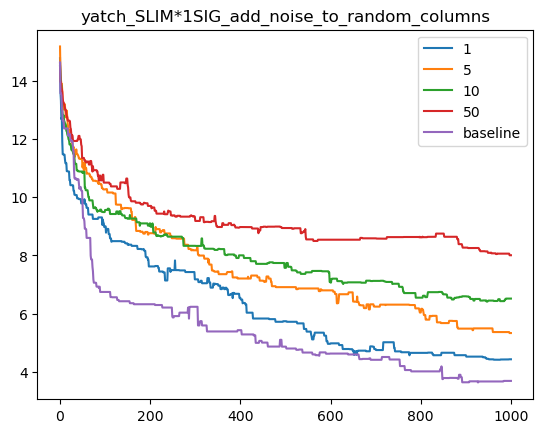

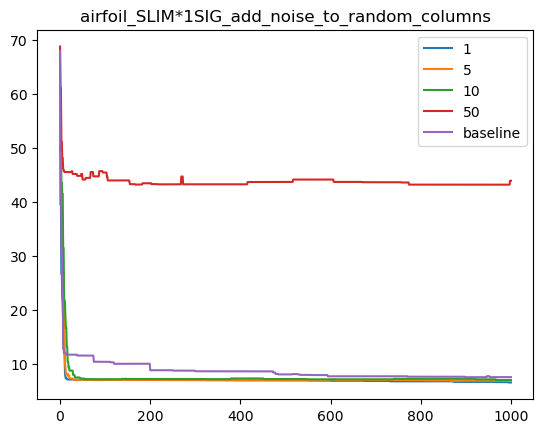

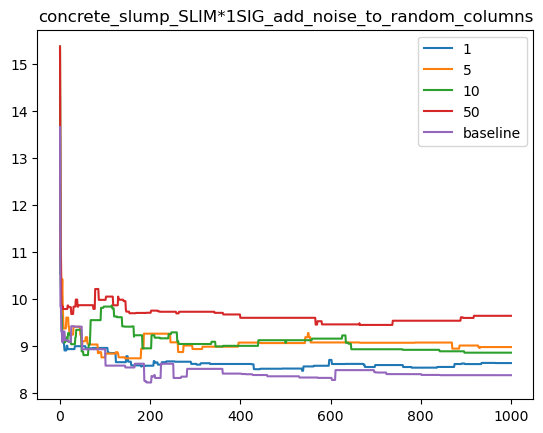

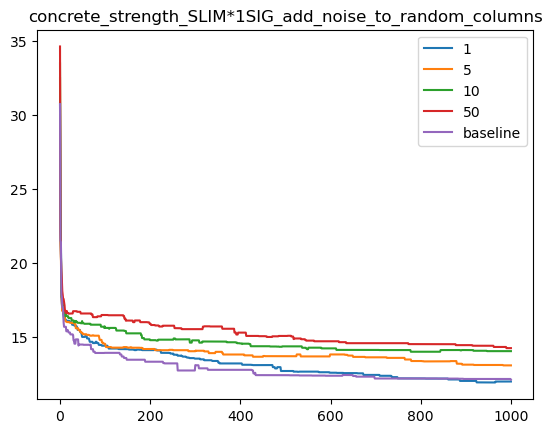

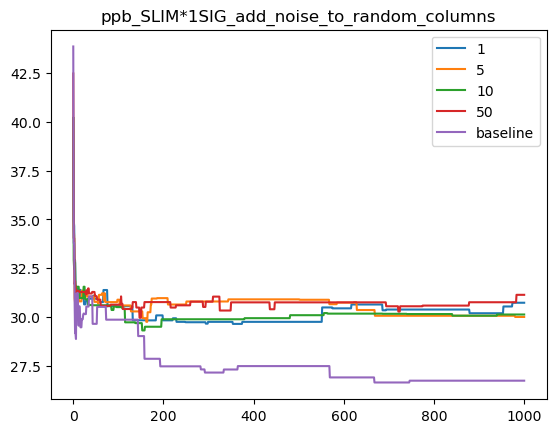

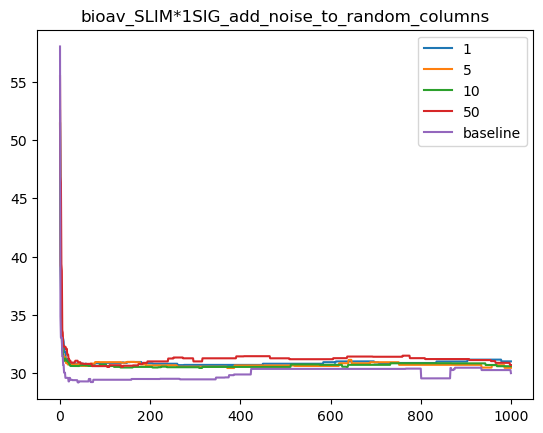

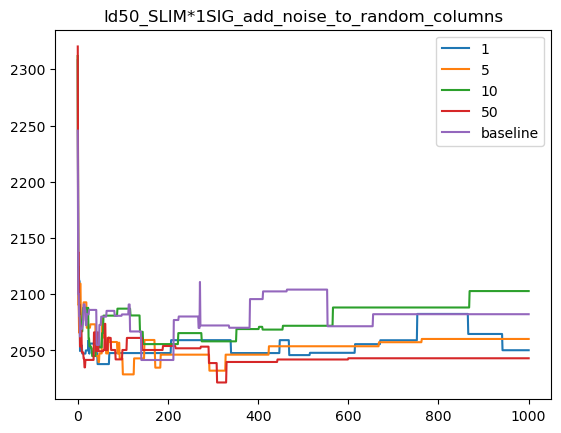

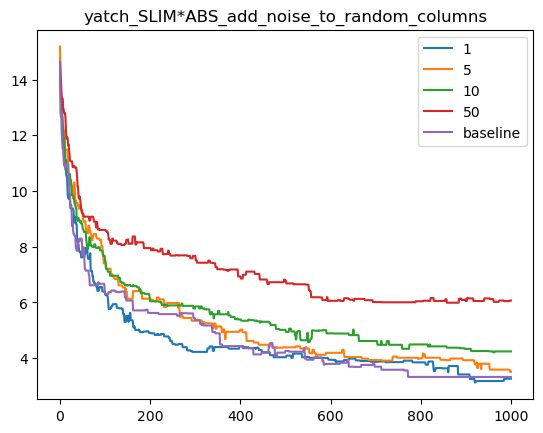

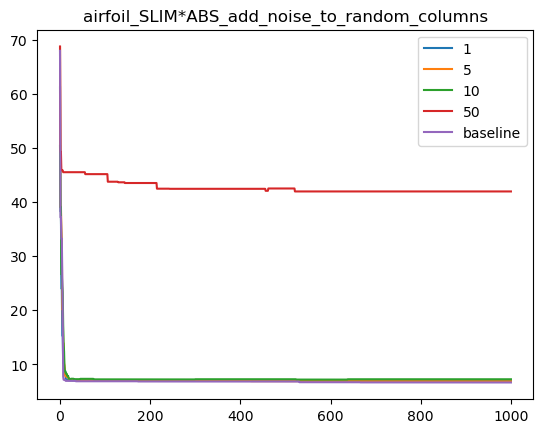

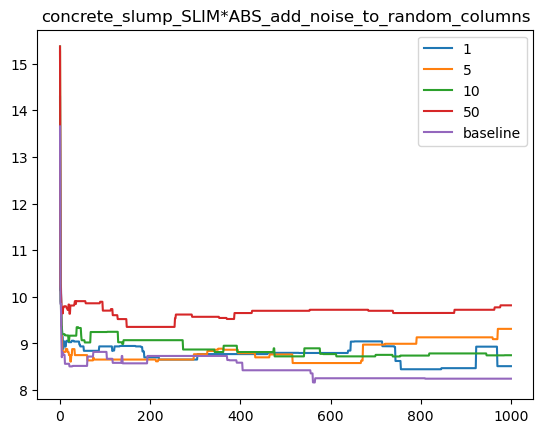

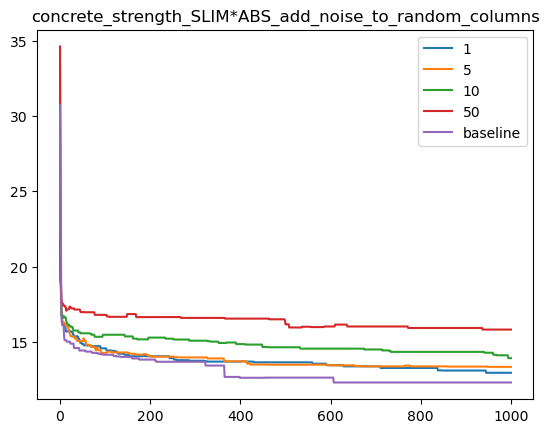

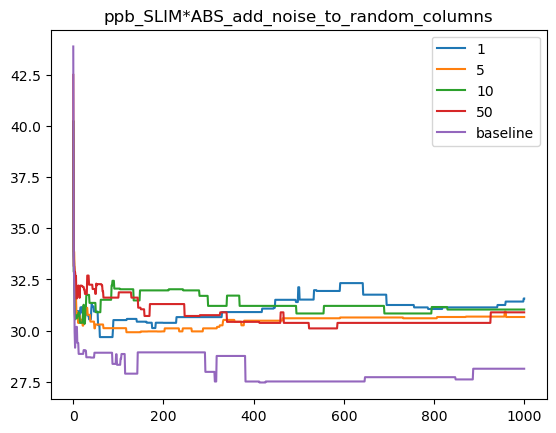

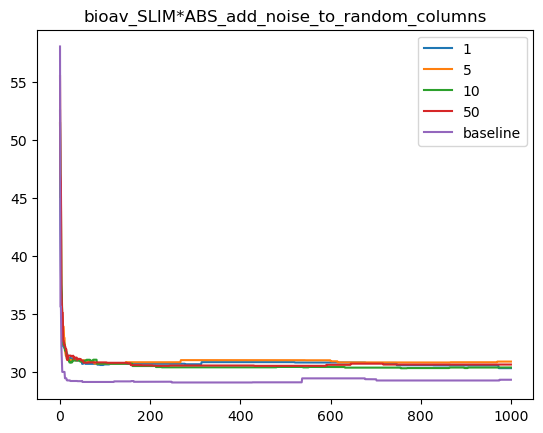

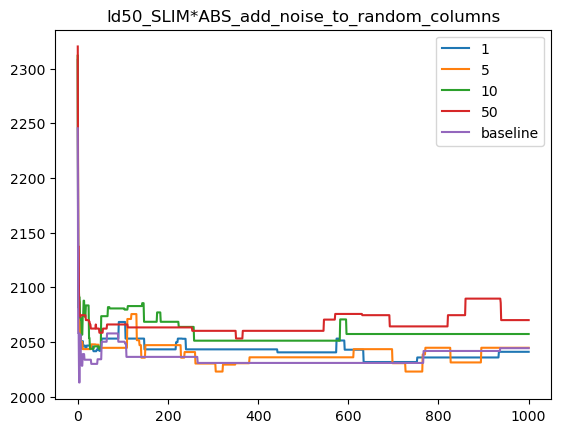

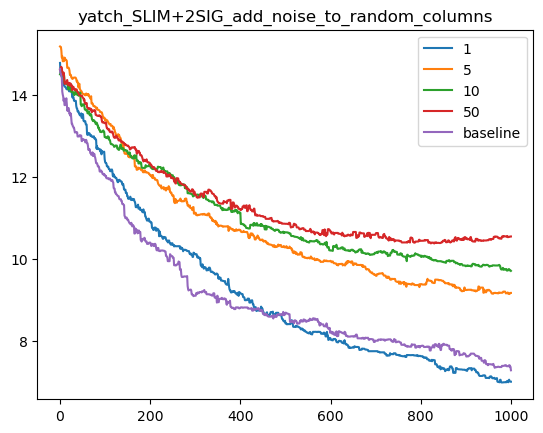

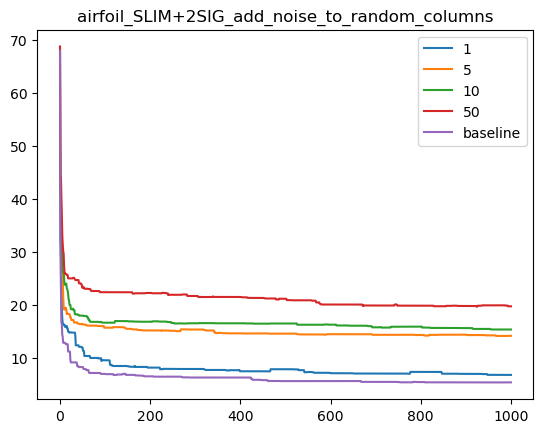

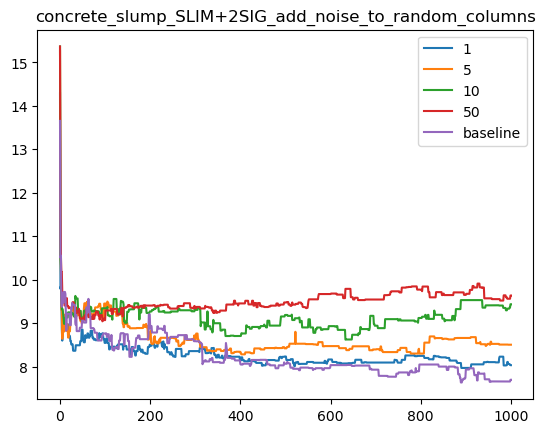

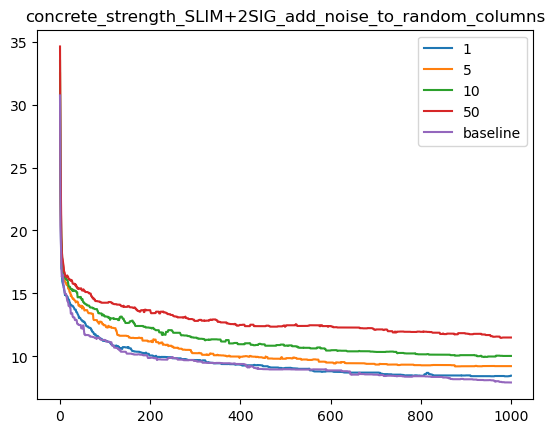

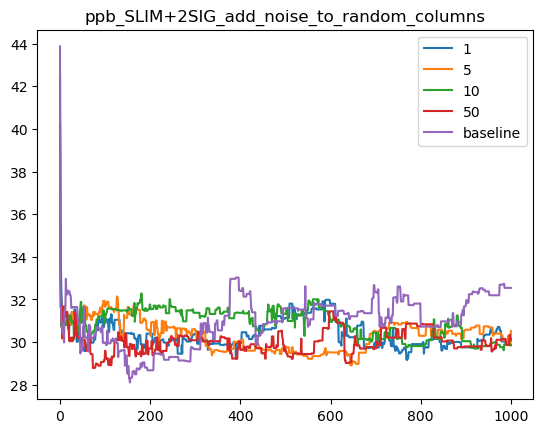

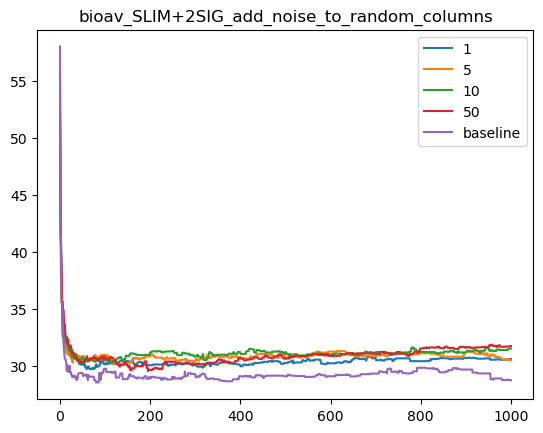

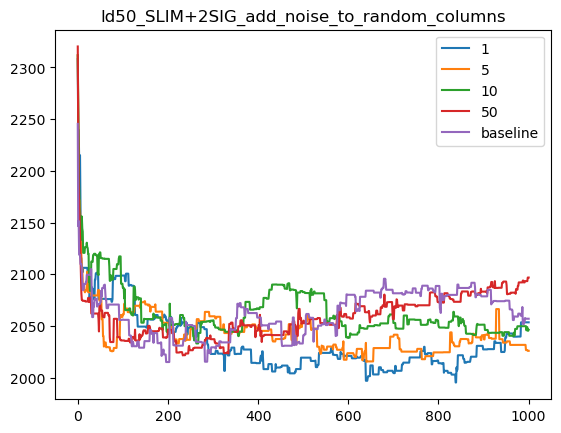

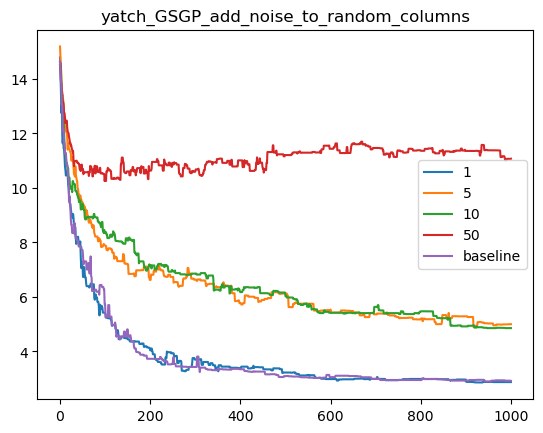

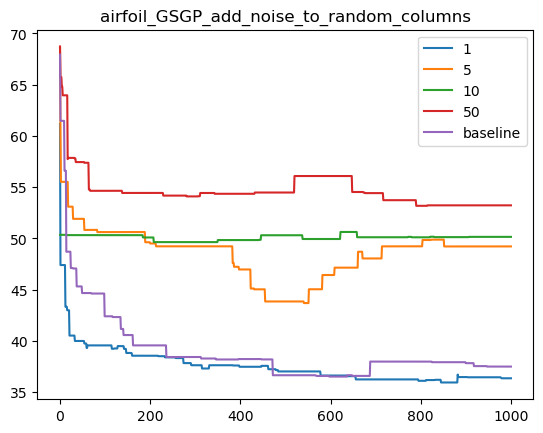

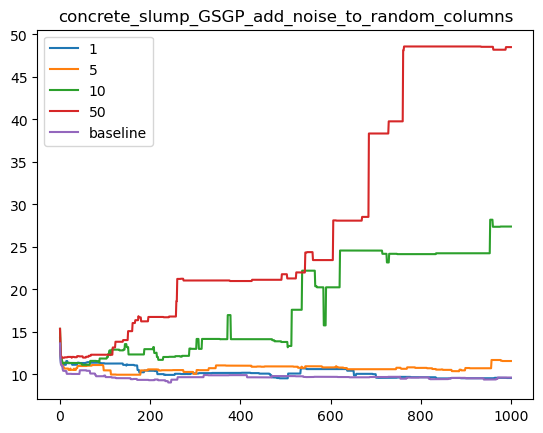

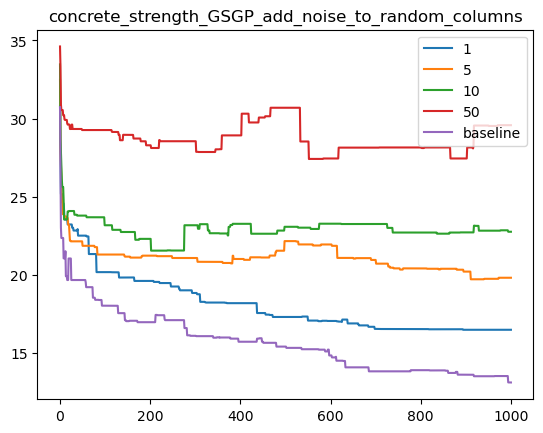

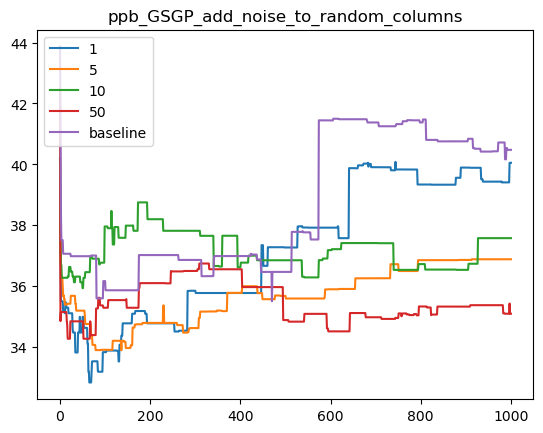

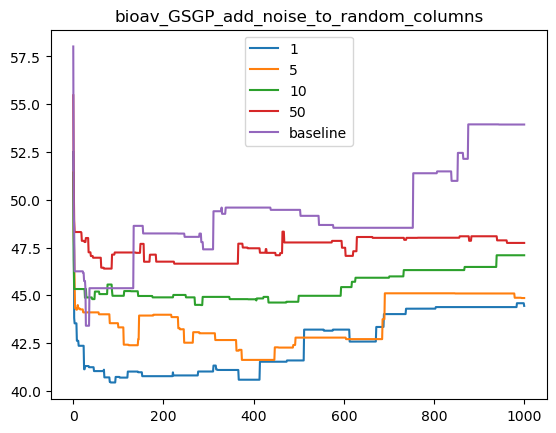

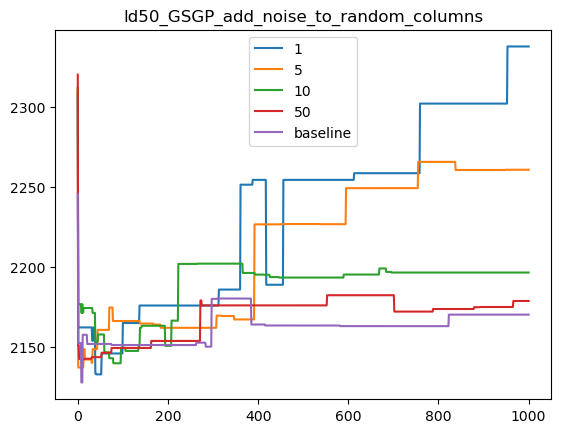

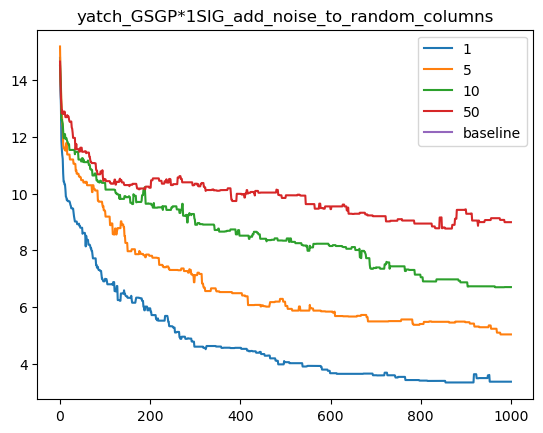

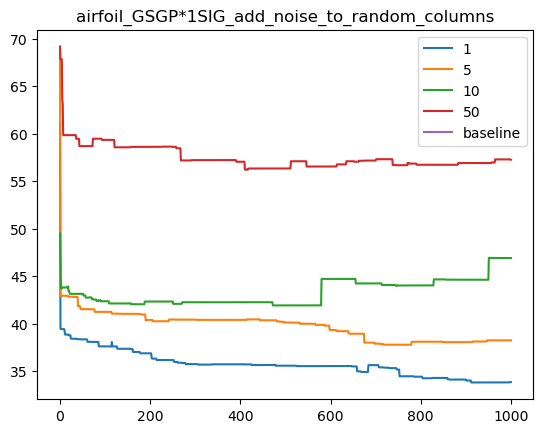

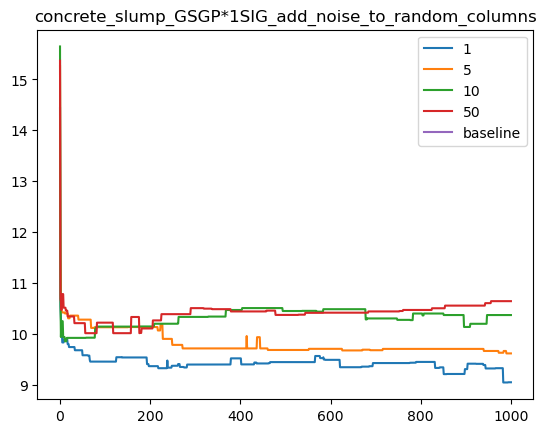

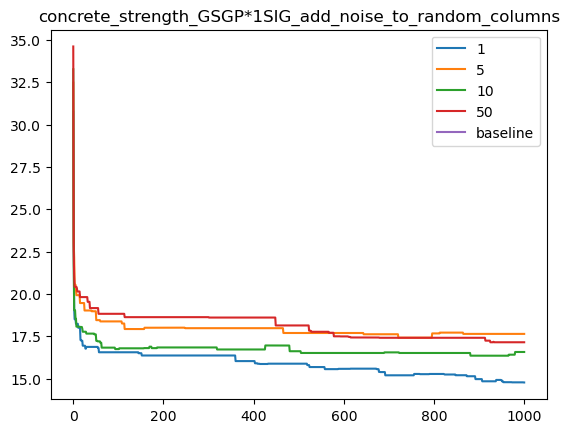

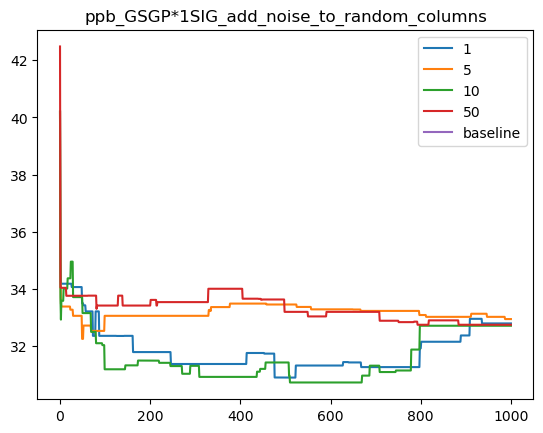

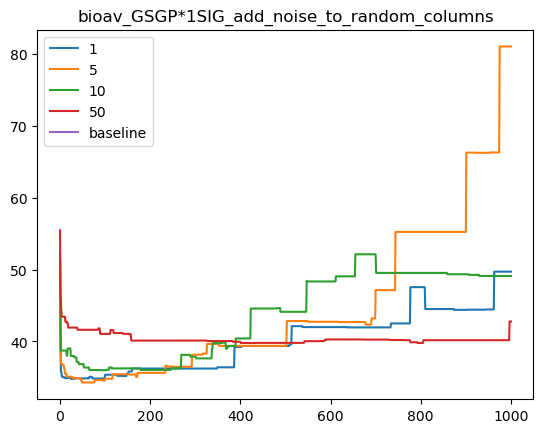

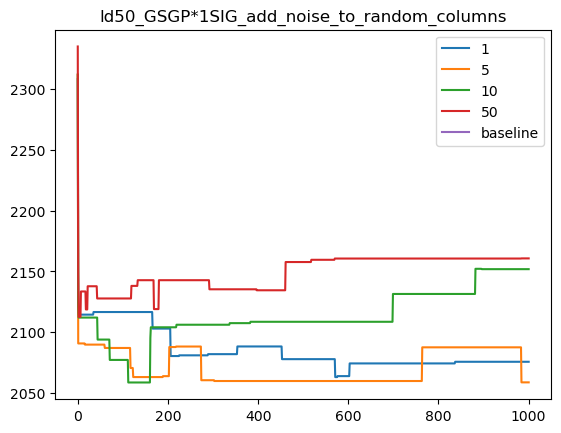

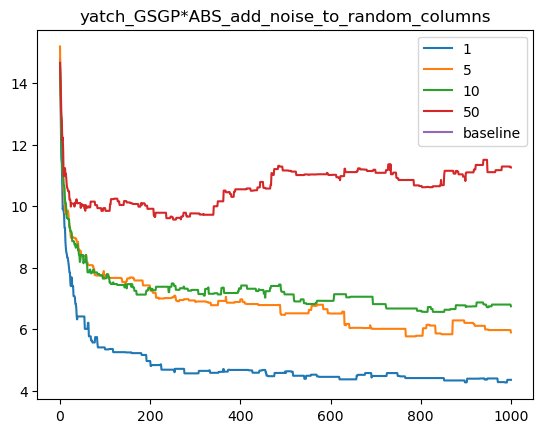

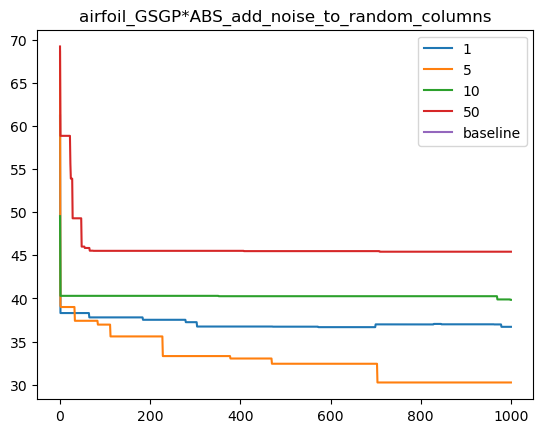

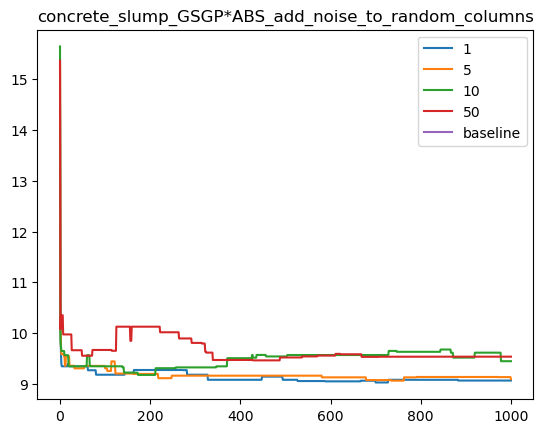

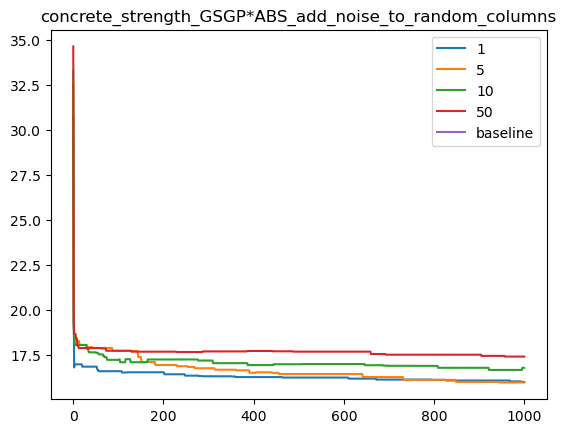

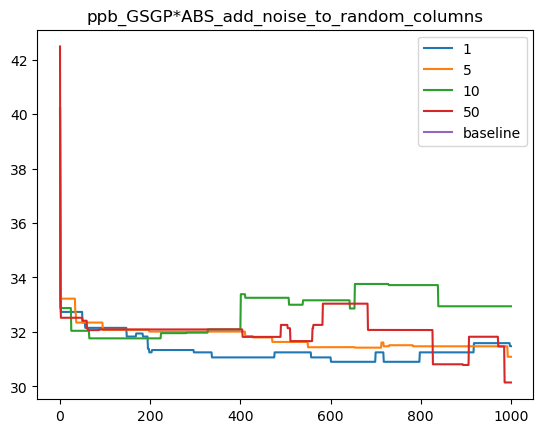

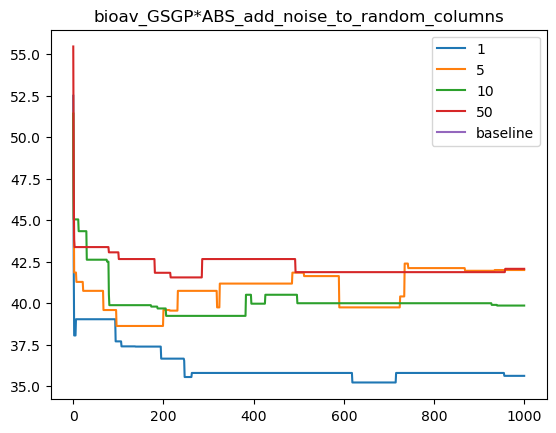

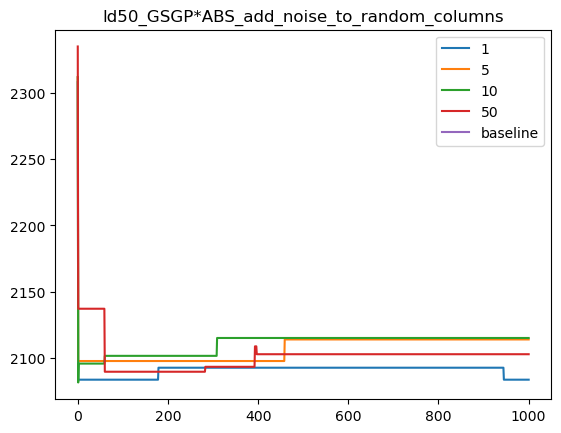

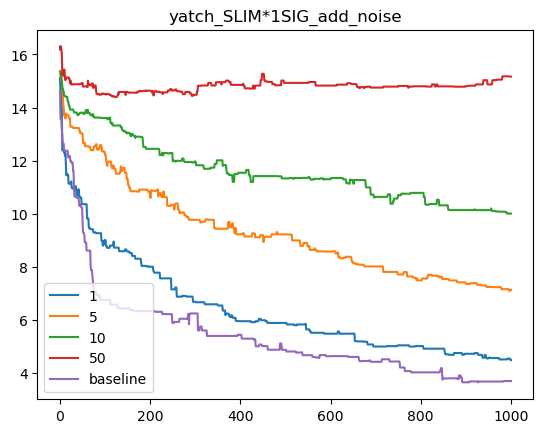


KeyboardInterrupt



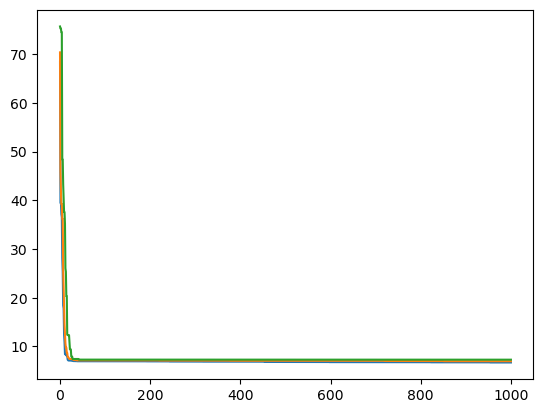

In [27]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['test_fitness'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['test_fitness'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [20]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        print(algo)
        for datas in data.dataset.unique(): 
            print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                ax = '' if pv > 0.05 else '*'
            
                print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print('\n')

add_noise_to_random_columns
SLIM*1SIG
yatch
1 : 0.31004412387652436
5 : 0.009104586694104593*
10 : 0.015490940482891756*
50 : 0.00010077152813308912*
airfoil
1 : 0.5219695053554594
5 : 0.2291551655222669
10 : 0.08870026815186603
50 : 8.856314370151679e-05*
concrete_slump
1 : 0.48219166095493815
5 : 0.09470997485228519
10 : 0.11471386476194391
50 : 0.09470997485228519
concrete_strength
1 : 0.48219166095493815
5 : 0.04394222286967825*
10 : 0.0023238003463012438*
50 : 5.234536616695991e-05*
ppb
1 : 0.17423795411945142
5 : 0.20586864962849072
10 : 0.11471386476194391
50 : 0.05879775704449843
bioav
1 : 0.2291551655222669
5 : 0.5633701759173014
10 : 0.6732665200106236
50 : 0.9875396431792867
ld50
1 : 0.7906278567101722
5 : 0.6506179356895665
10 : 0.6732665200106236
50 : 0.7194457366855653


SLIM*ABS
yatch
1 : 0.9875396431792867
5 : 0.3733636355831279
10 : 0.09470997485228519
50 : 0.00021448233973810725*
airfoil
1 : 0.2953929127117212
5 : 0.14638597411348
10 : 0.06766474200791676
50 : 0.00010

Count how many times the version with noise has worse performances compared with the baseline

In [12]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count + 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else count
                
                # pv = mannwhitneyu(baseline_v, data_v, alternative = 'less')[1][0]
                # count = count + 1 if pv < 0.05 else count

                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 7
SLIM*ABS : 4
SLIM+2SIG : 14
GSGP : 11
GSGP*1SIG : 12
GSGP*ABS : 9


add_noise
SLIM*1SIG : 9
SLIM*ABS : 9
SLIM+2SIG : 16
GSGP : 13
GSGP*1SIG : 15
GSGP*ABS : 15




In [11]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in [ 1,  5, 10]:
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count + 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else count
                
                # pv = mannwhitneyu(baseline_v, data_v, alternative = 'less')[1][0]
                # count = count + 1 if pv < 0.05 else count

                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 4
SLIM*ABS : 1
SLIM+2SIG : 9
GSGP : 7
GSGP*1SIG : 8
GSGP*ABS : 5


add_noise
SLIM*1SIG : 5
SLIM*ABS : 4
SLIM+2SIG : 11
GSGP : 9
GSGP*1SIG : 11
GSGP*ABS : 10




In [31]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in [ 50]:
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count if pv > 0.05 else count + 1
            
                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 3
SLIM*ABS : 3
SLIM+2SIG : 5
GSGP : 4


add_noise
SLIM*1SIG : 4
SLIM*ABS : 5
SLIM+2SIG : 5
GSGP : 4




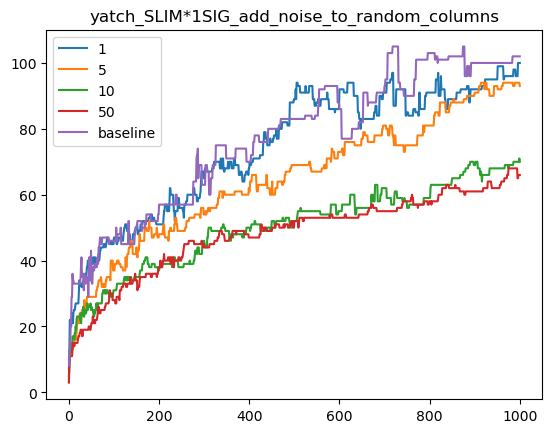

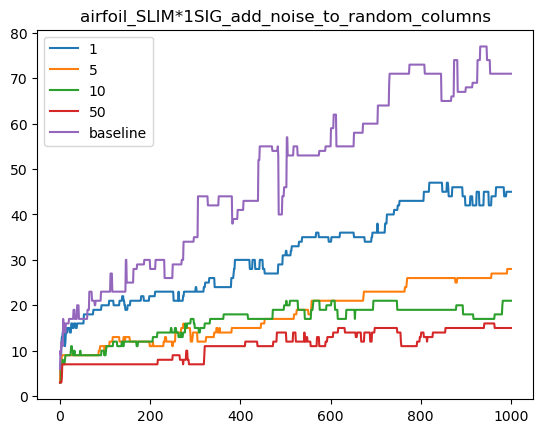

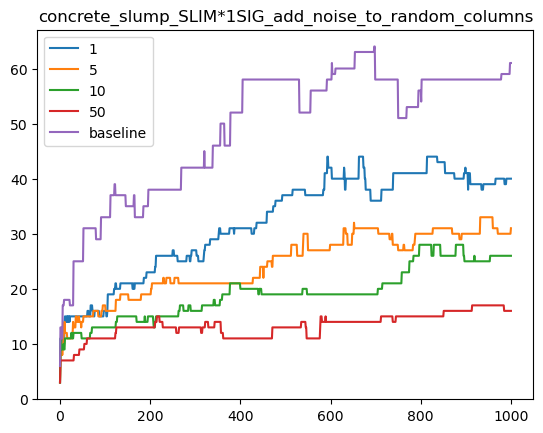

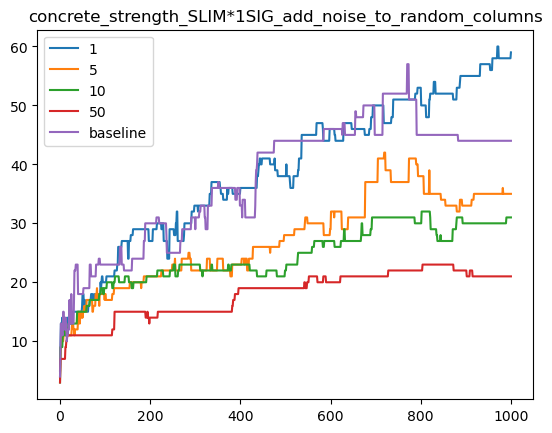

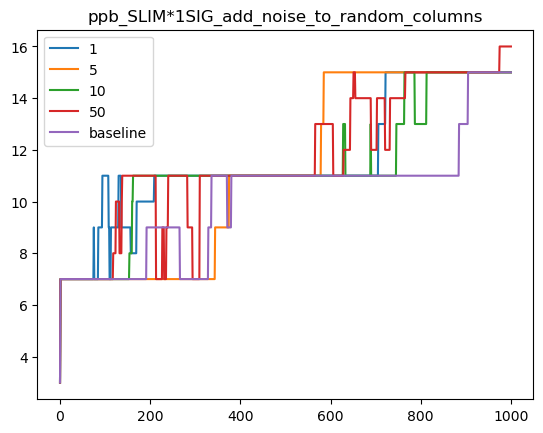

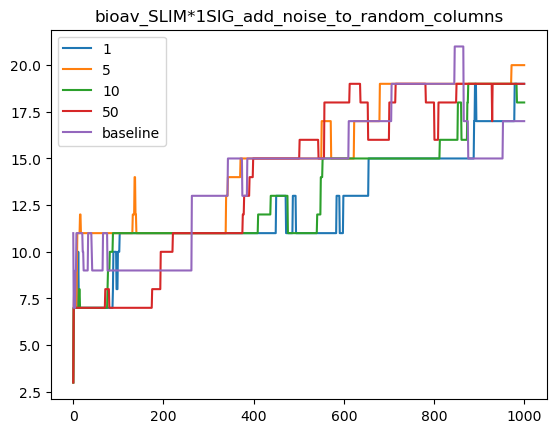

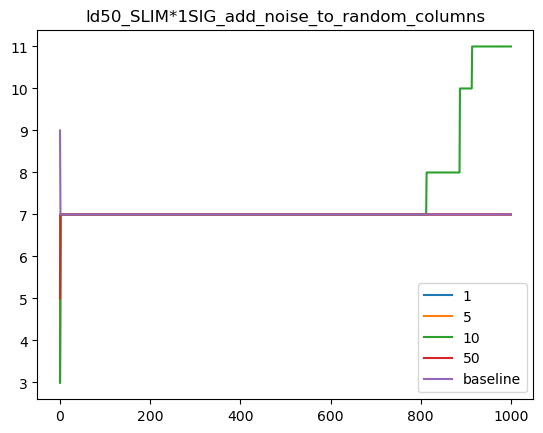

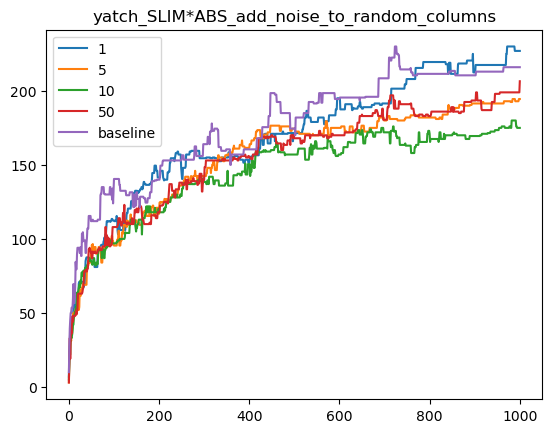

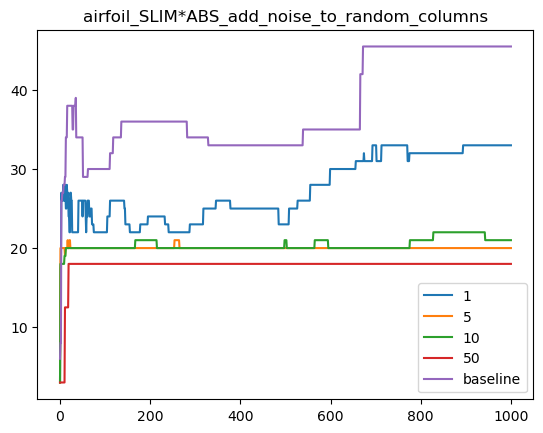

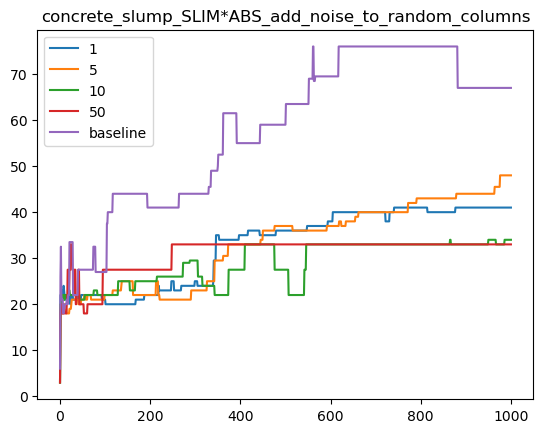

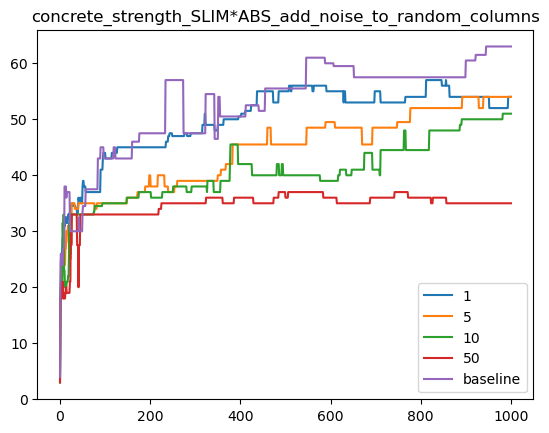

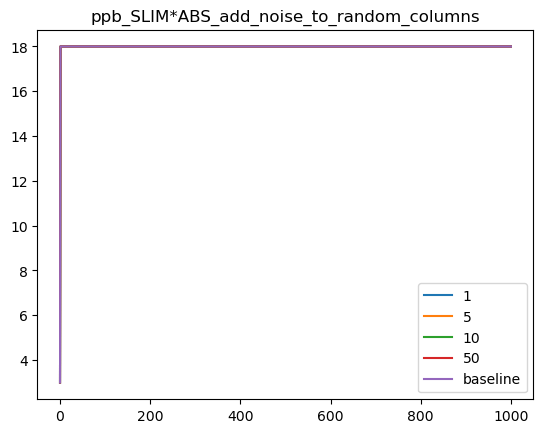

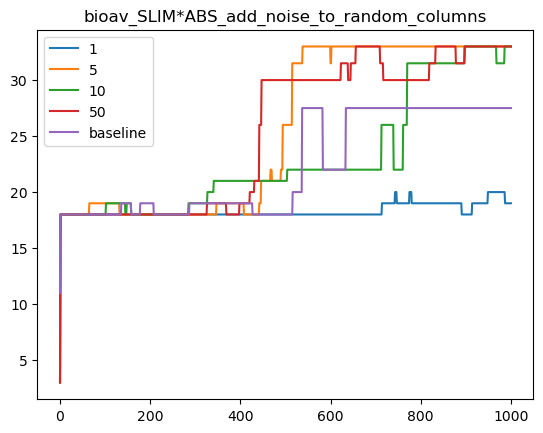

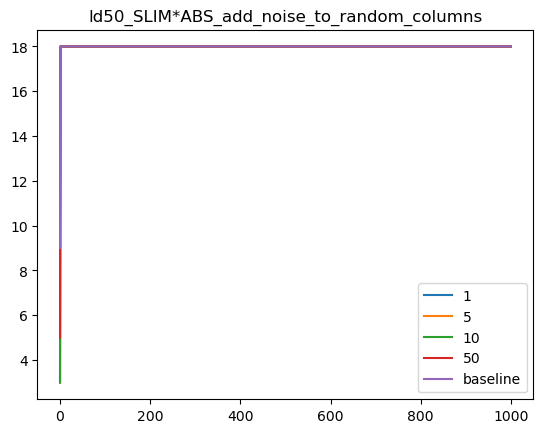

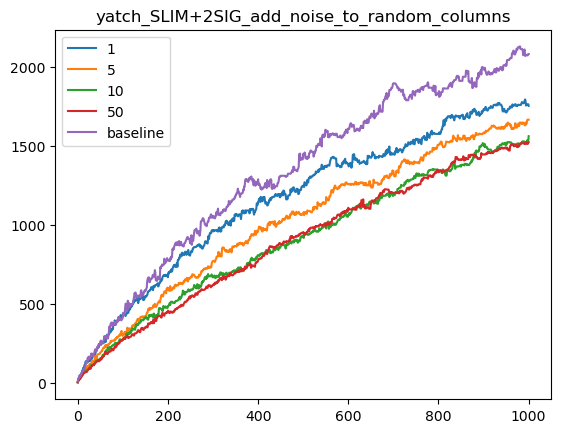

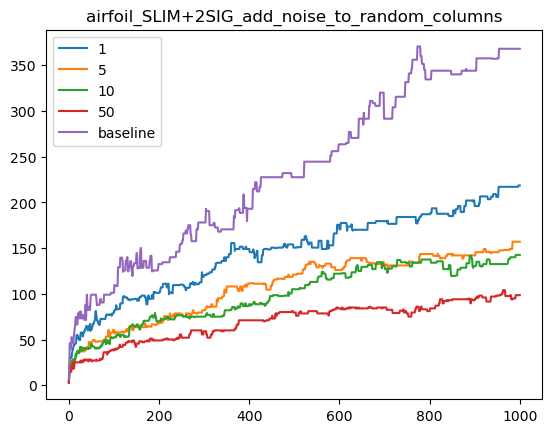

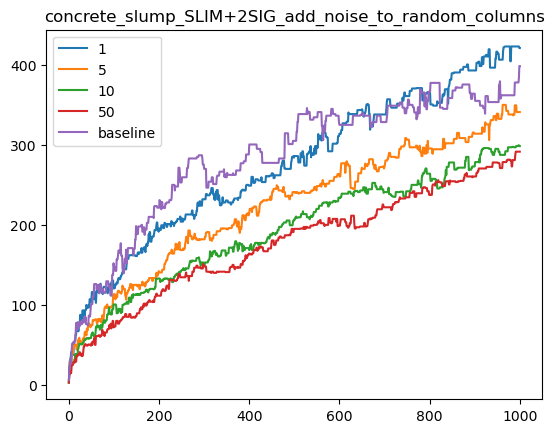

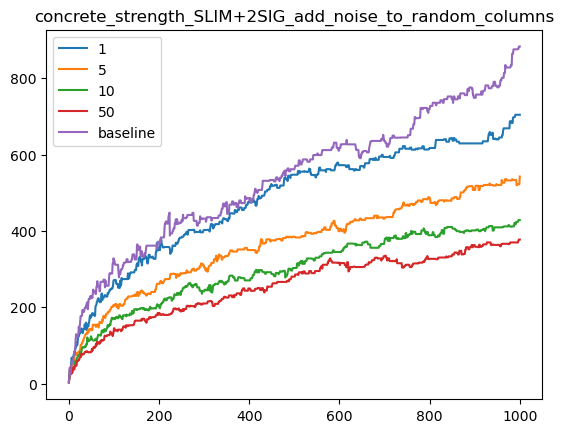

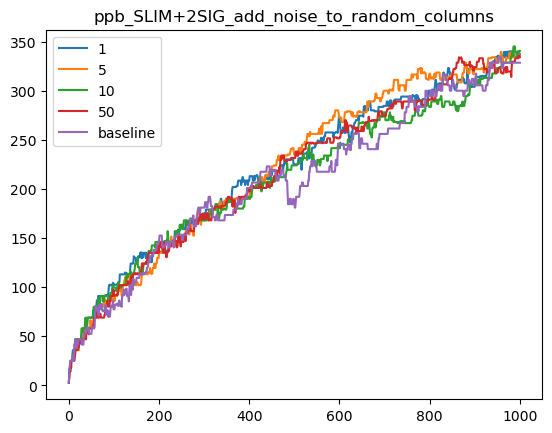

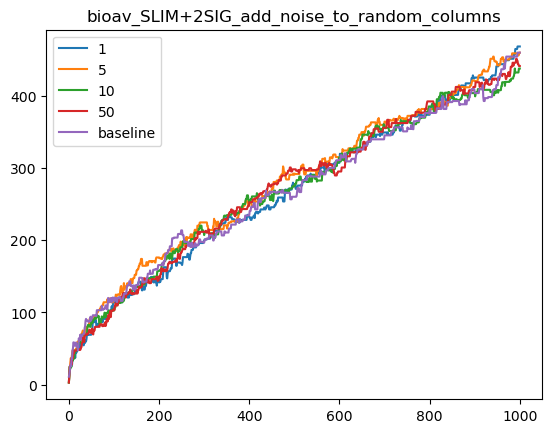

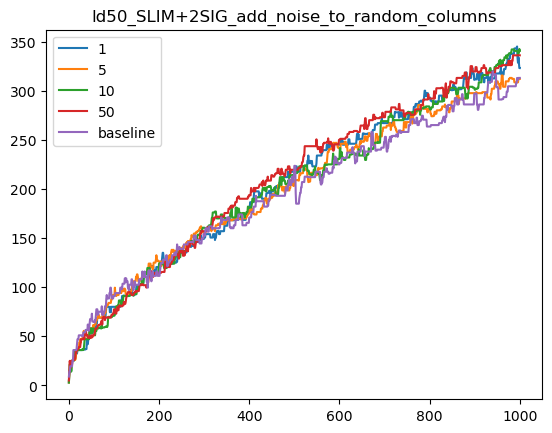

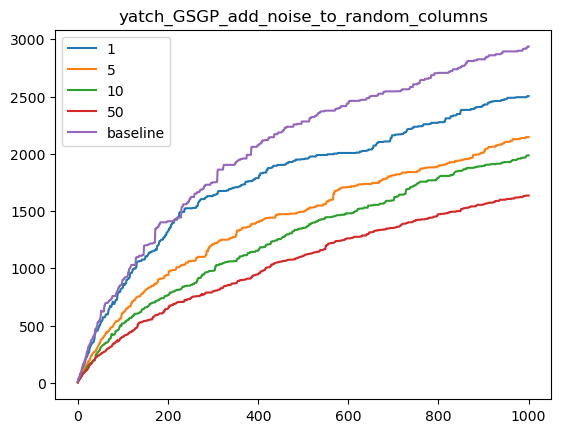

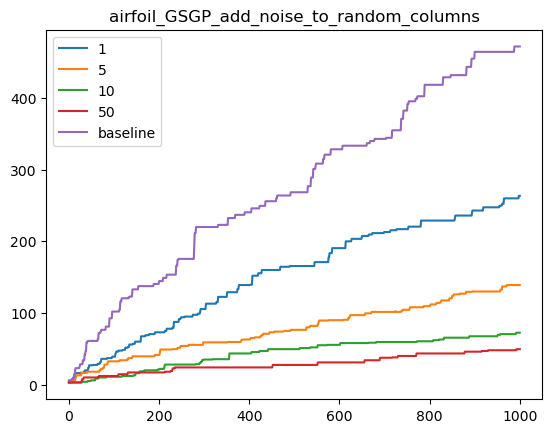

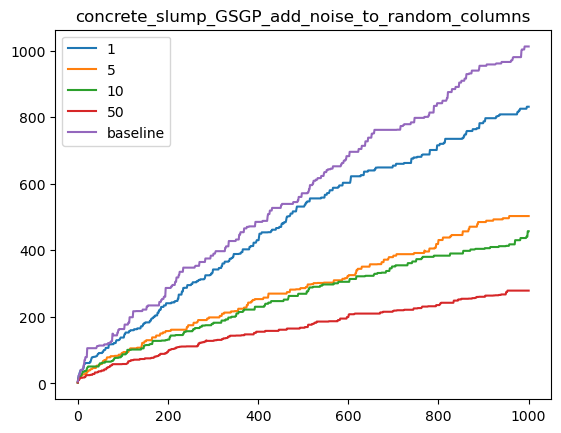

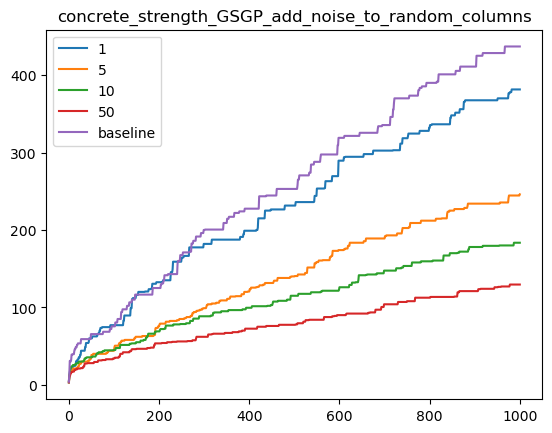

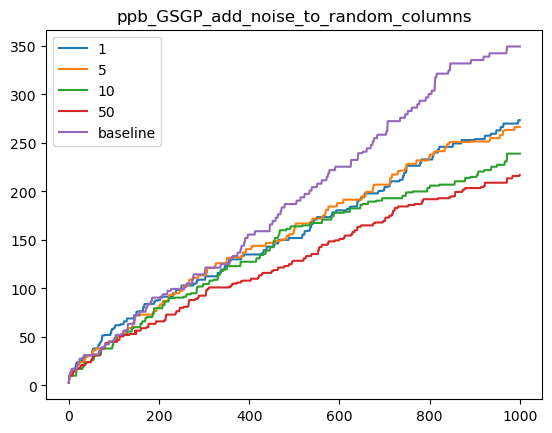

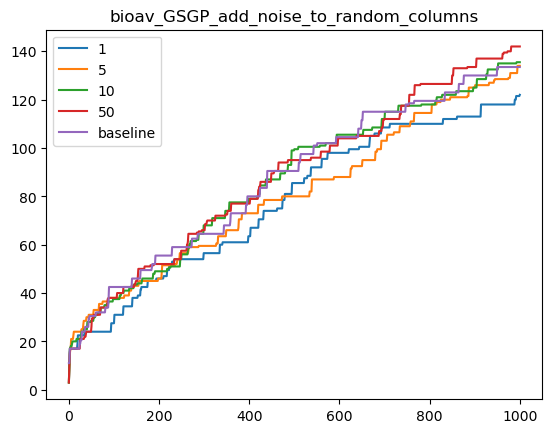

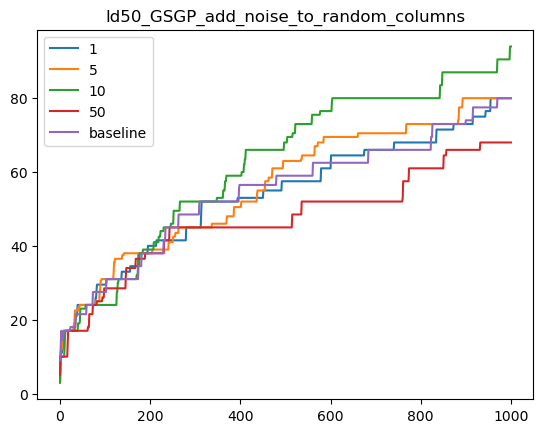

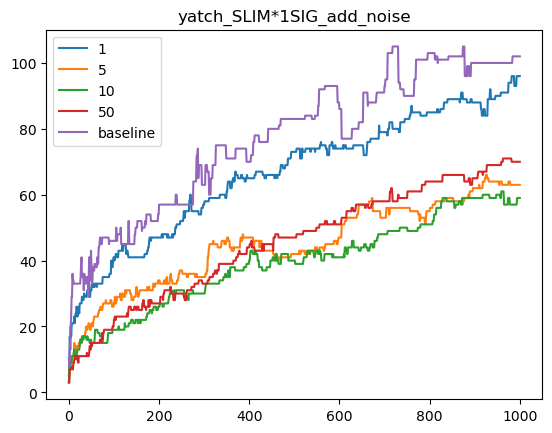

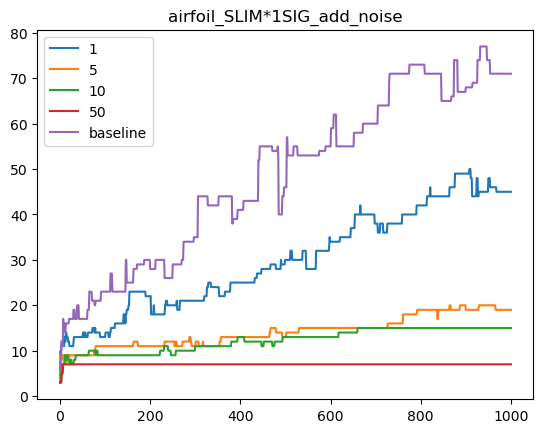

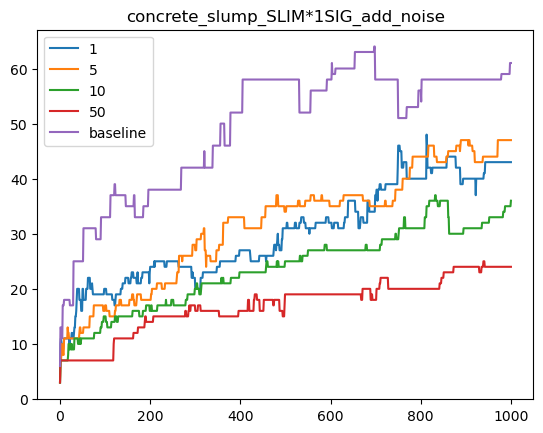

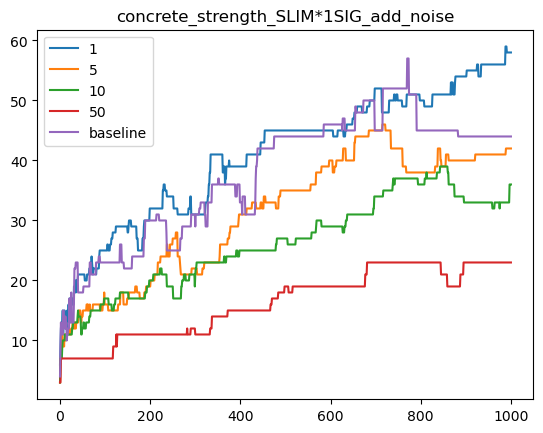

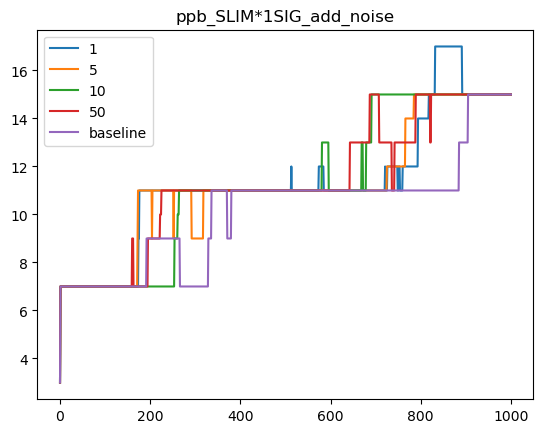

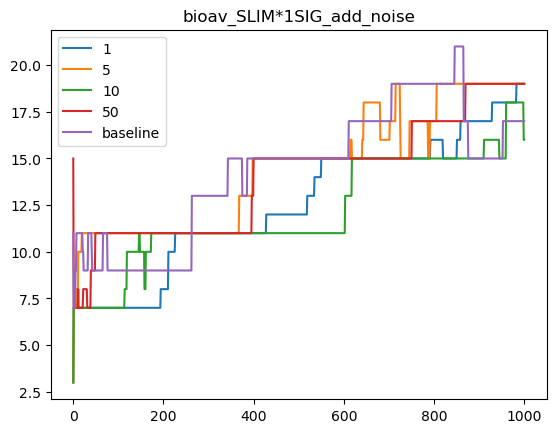

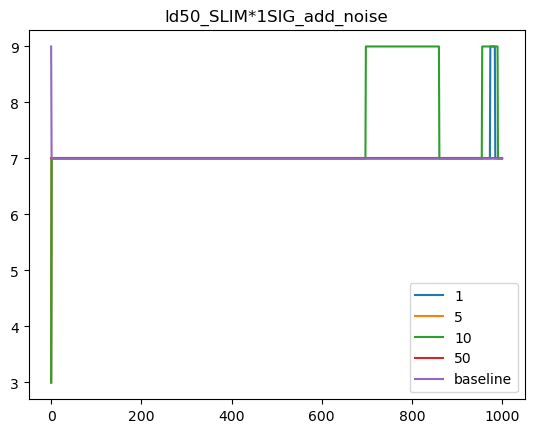

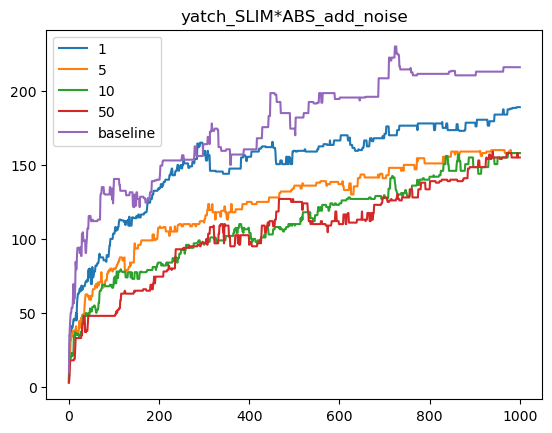

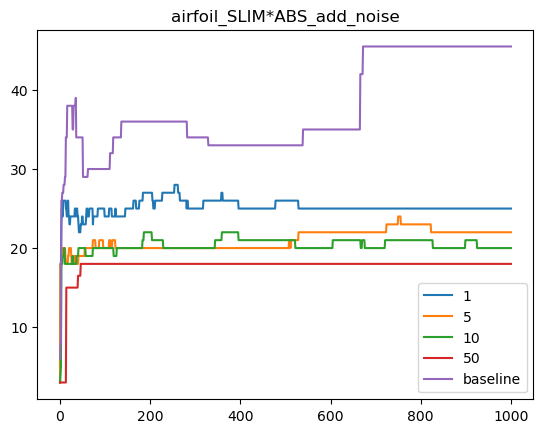

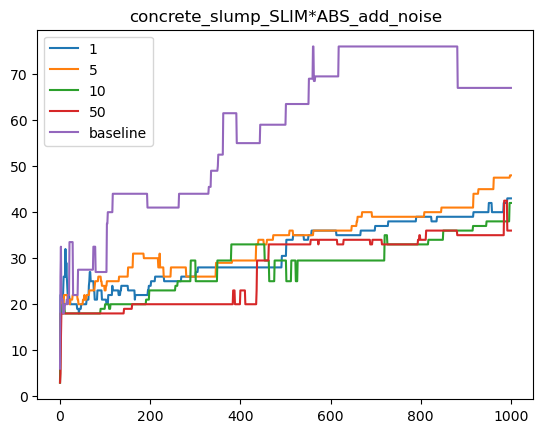

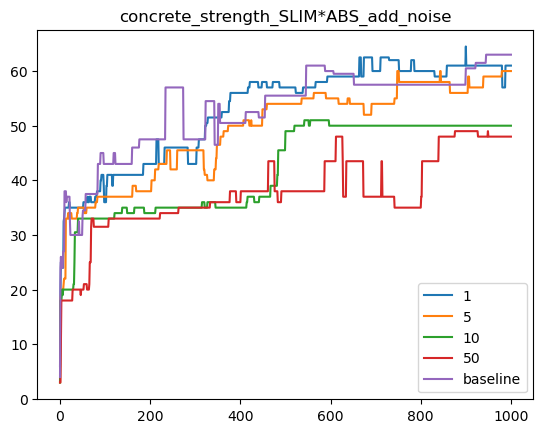

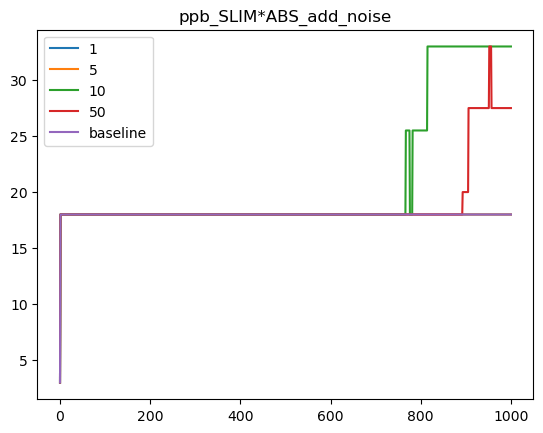

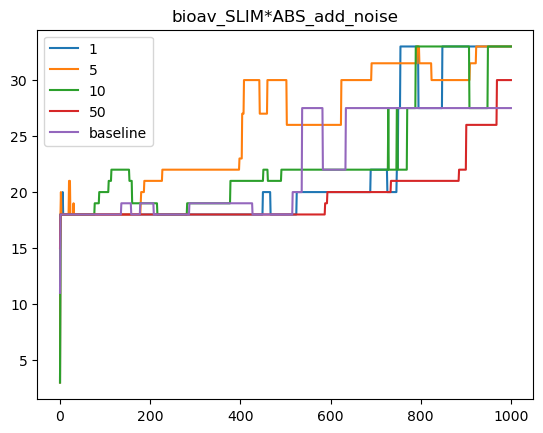

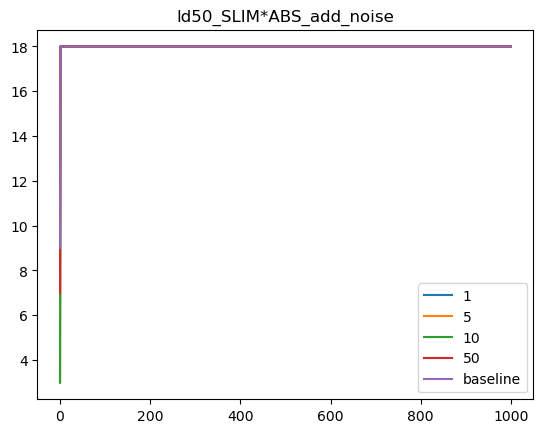

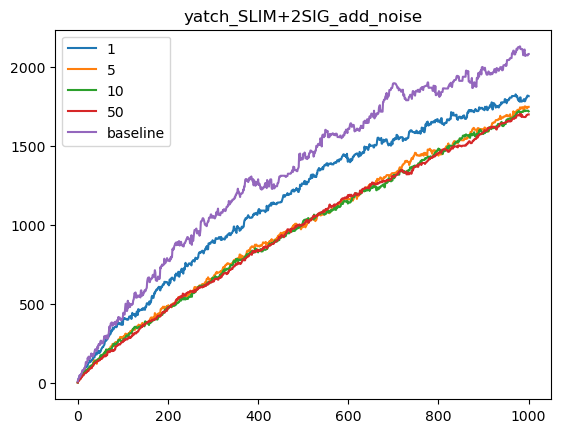

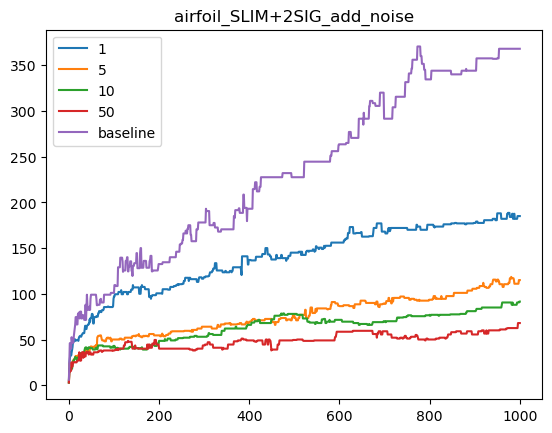

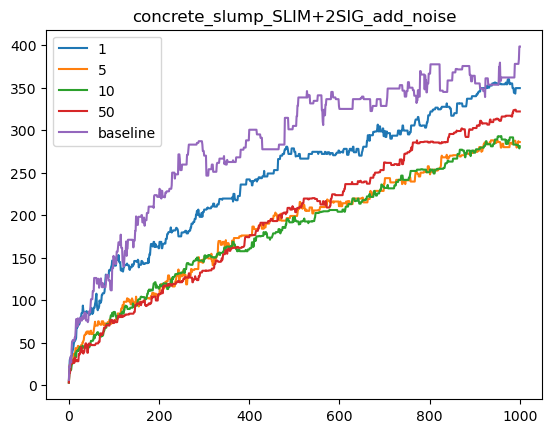

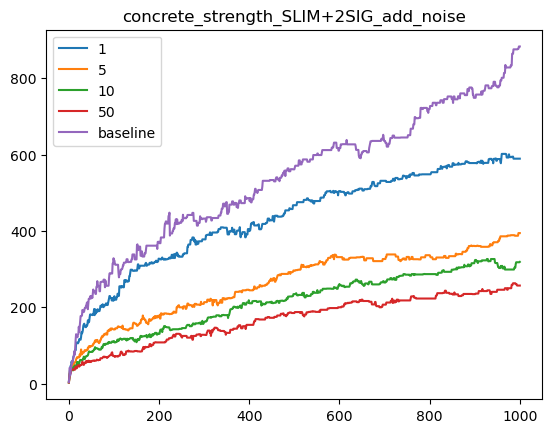

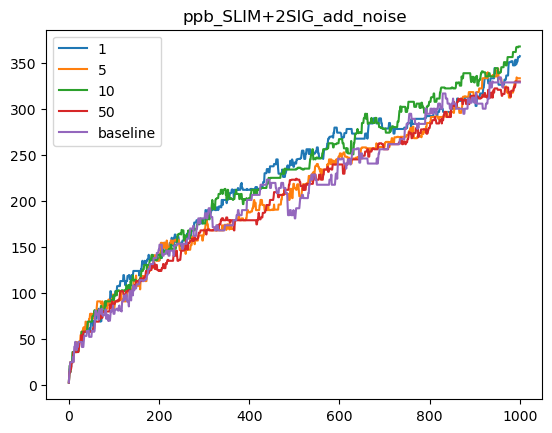

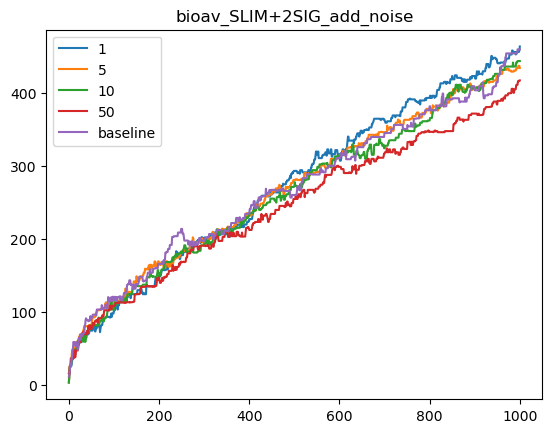

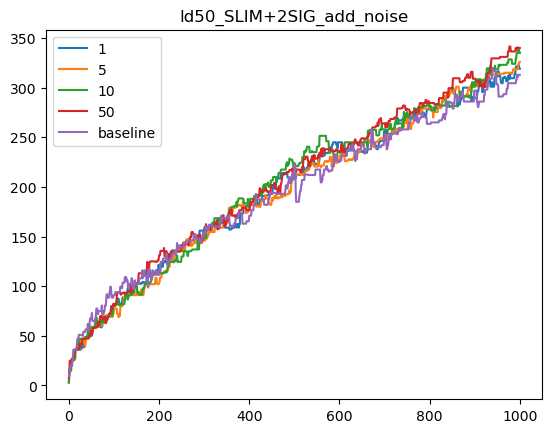

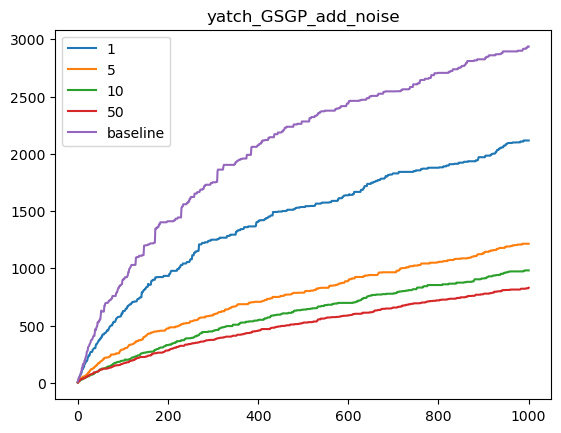

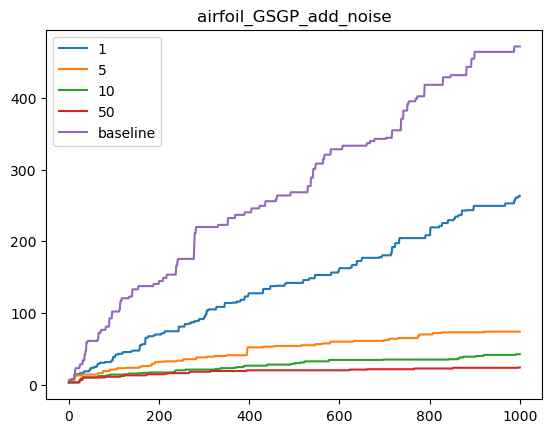

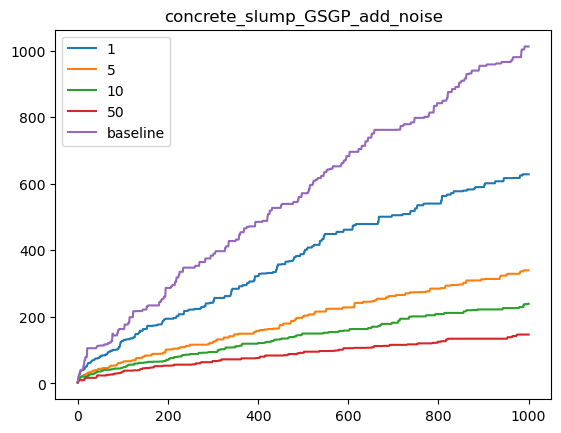

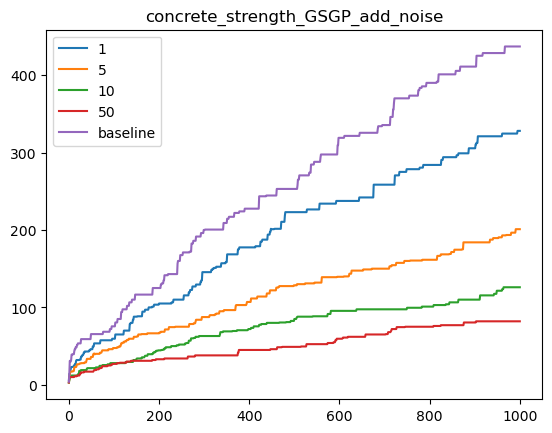

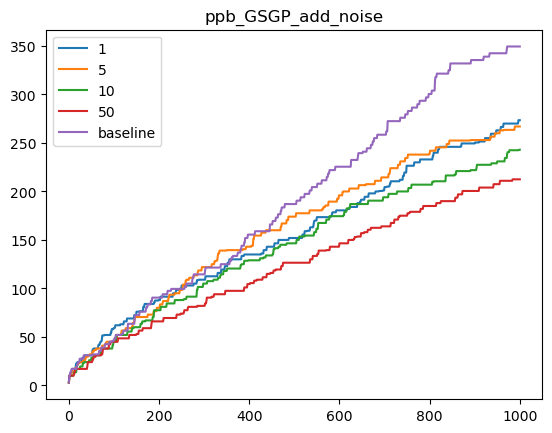

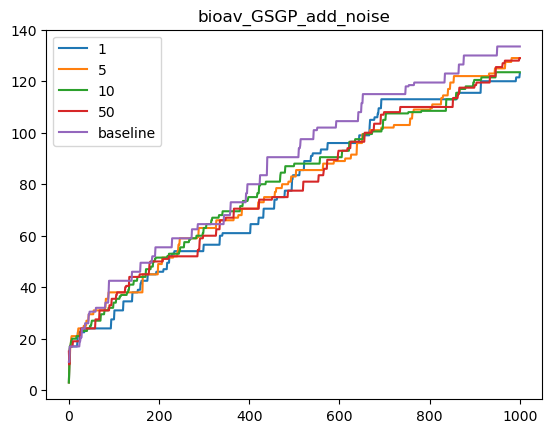

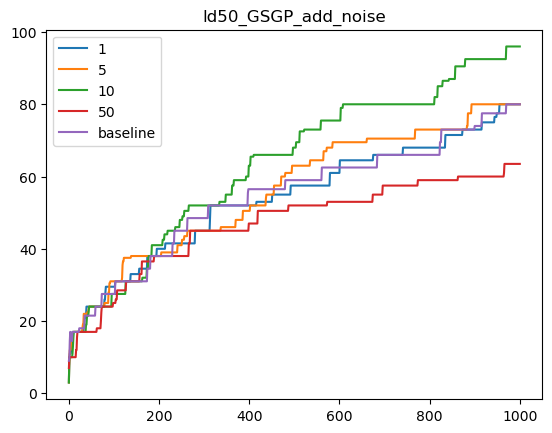

In [21]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['elite_size'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['elite_size'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [40]:
counts = pd.read_csv('../main/log/_20241018.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})

In [41]:
counts2 = pd.read_csv('../main/log/_20241028.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})
counts2 = counts2.query("experiment_id == '4b572b24-9500-11ef-8b35-72c976fed59c'")

In [42]:
counts3 = pd.read_csv('../main/log/_20241112.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})

In [43]:
counts = pd.concat((counts, counts2))
counts = pd.concat((counts, counts3))

In [44]:
counts["count_v"] = counts.counts_v.apply(lambda x: sum([int(el) for el in x]))

In [45]:
counts.head()

algo                         experiment_id  noise dataset counts_v  \
0  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [1]   
1  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [3]   
2  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch     [10]   
3  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [5]   
4  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [6]   

                    experiment  count_v  
0  add_noise_to_random_columns        1  
1  add_noise_to_random_columns        3  
2  add_noise_to_random_columns       10  
3  add_noise_to_random_columns        5  
4  add_noise_to_random_columns        6

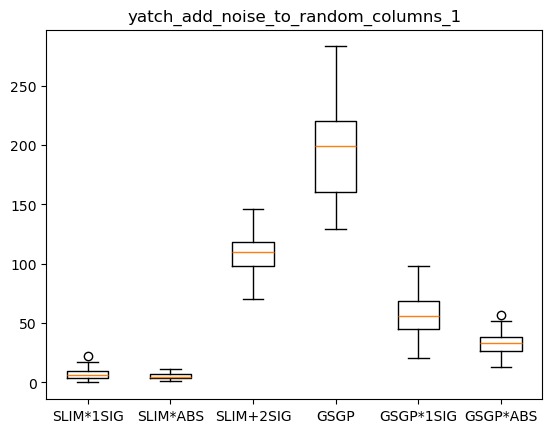

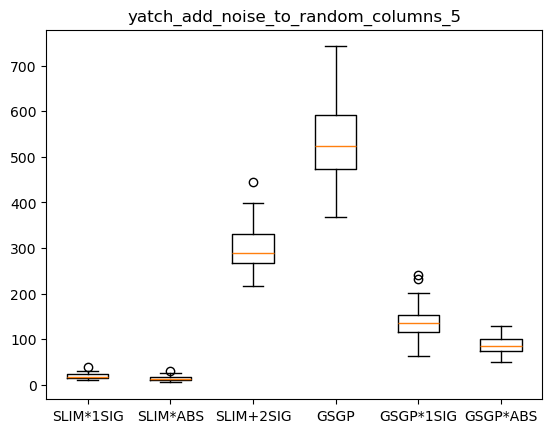

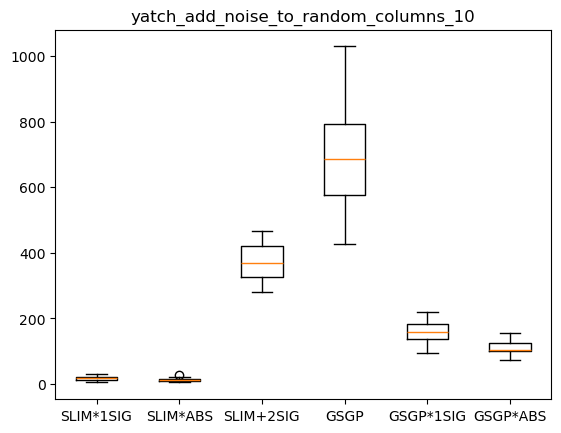

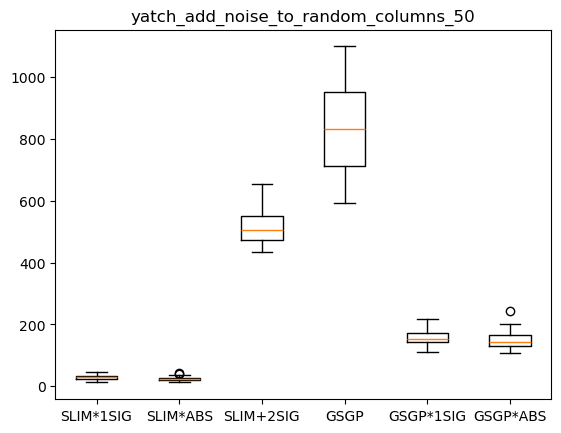

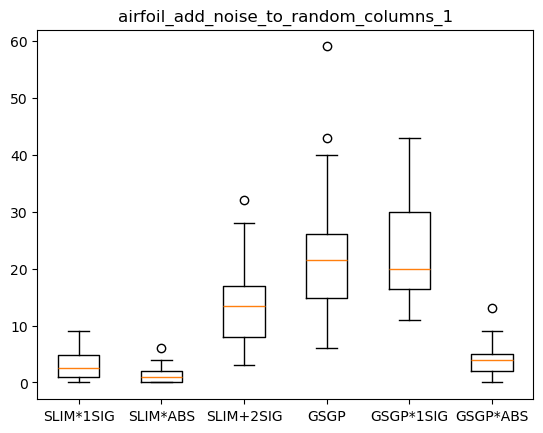

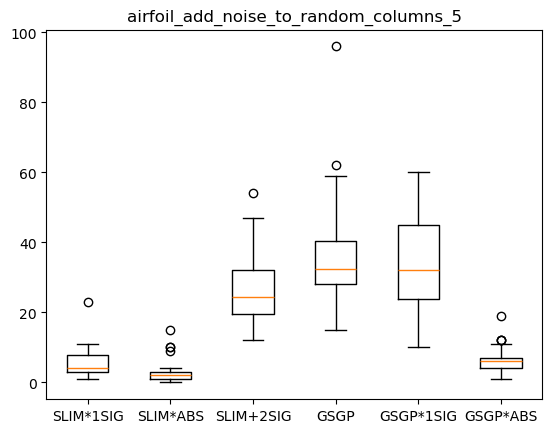

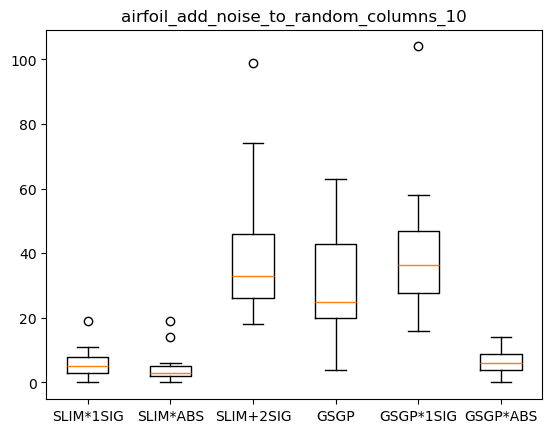

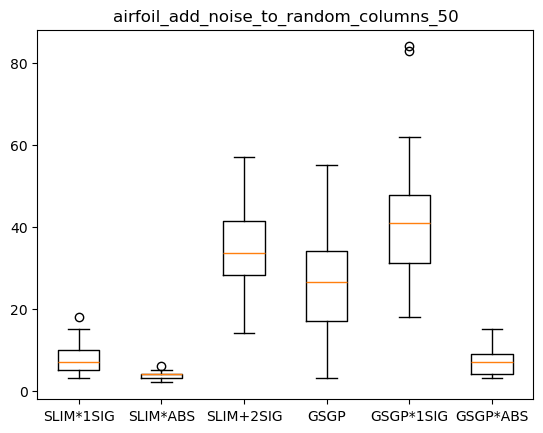

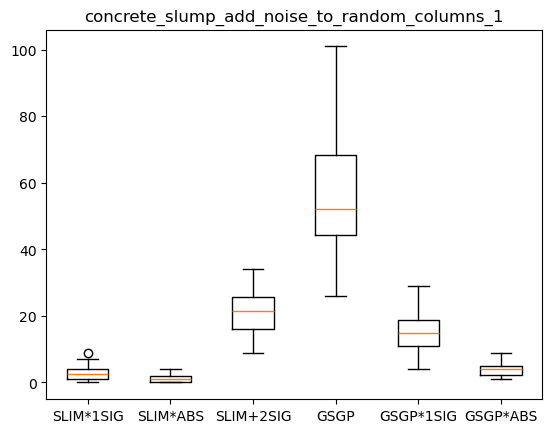

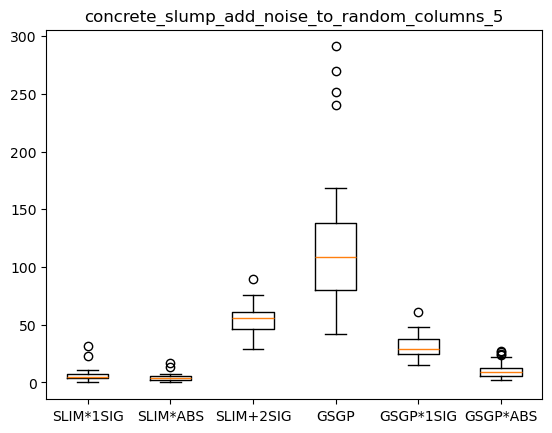

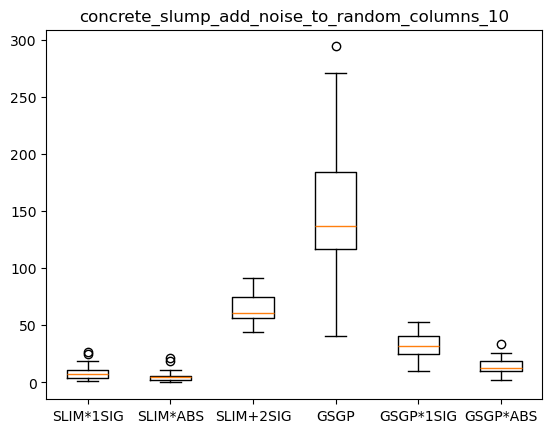

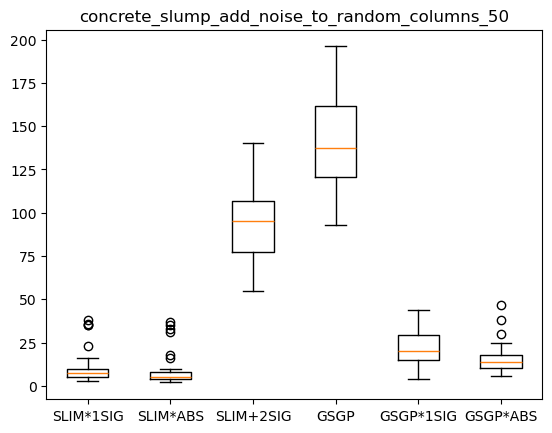

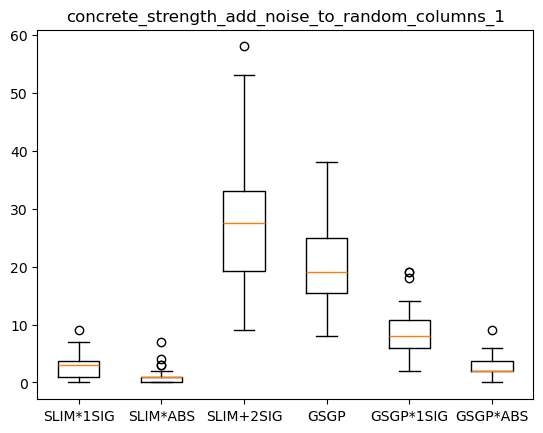

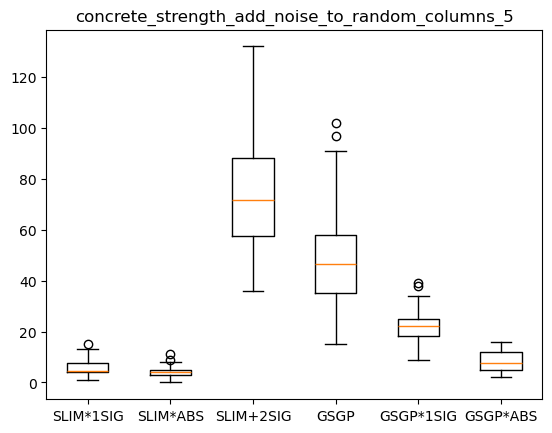

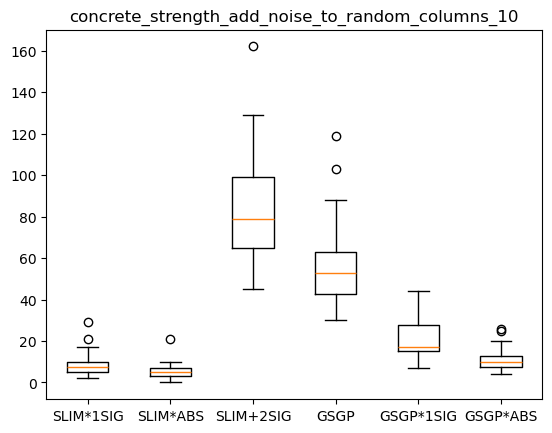

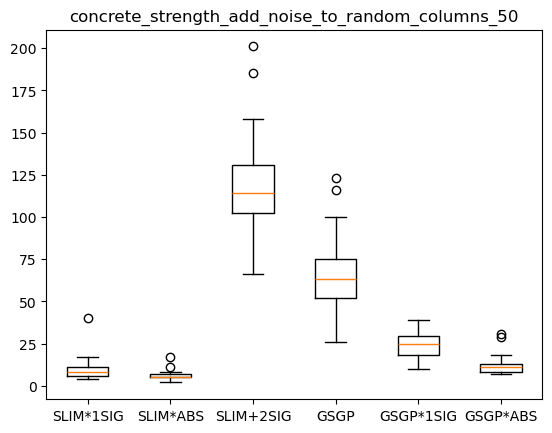

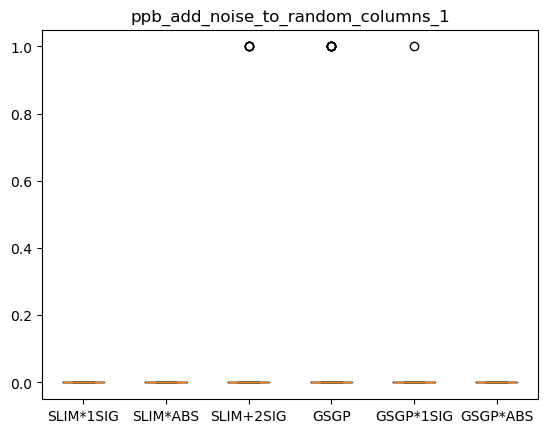

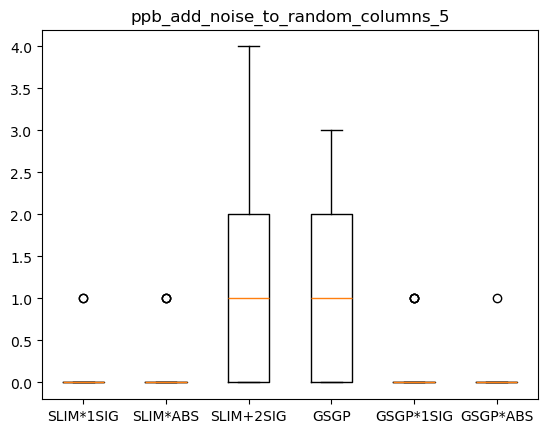

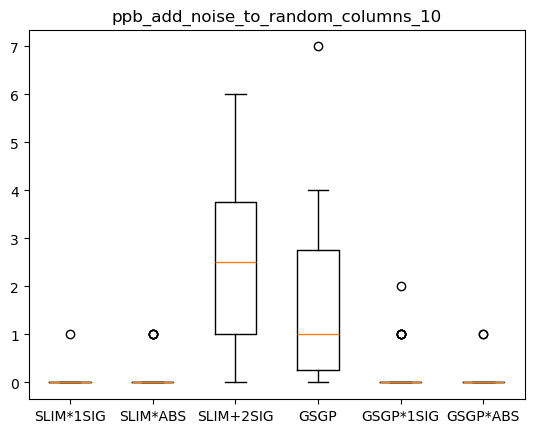

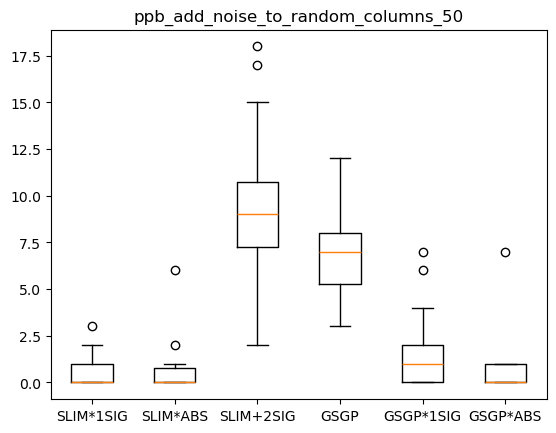

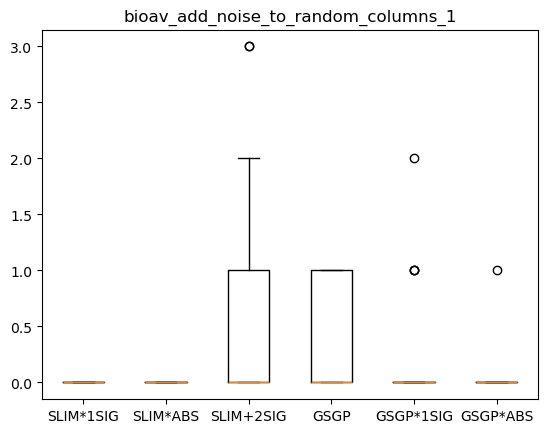

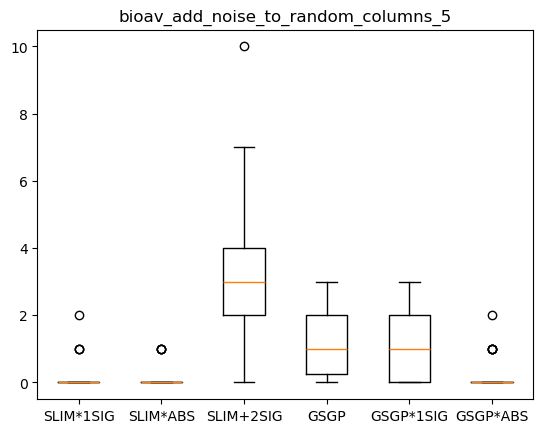

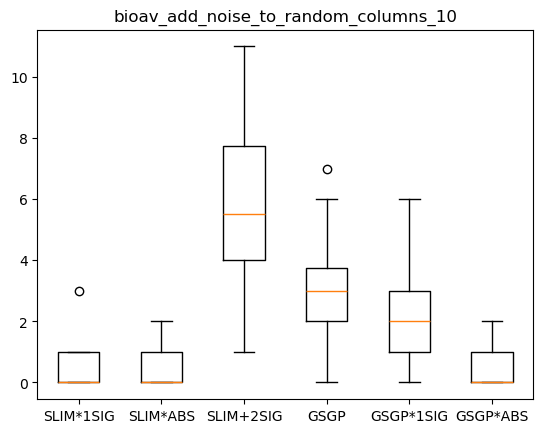

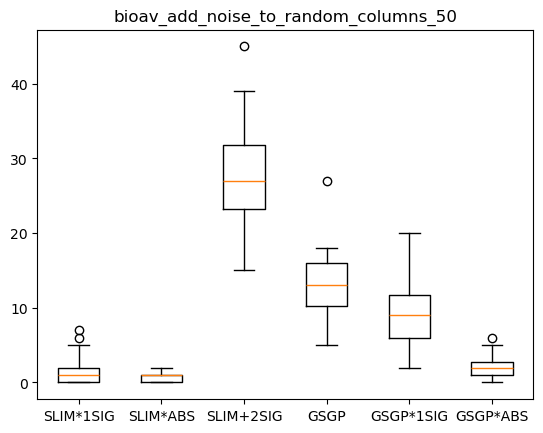

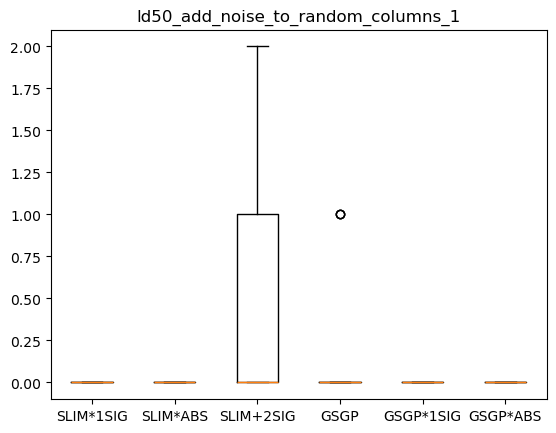

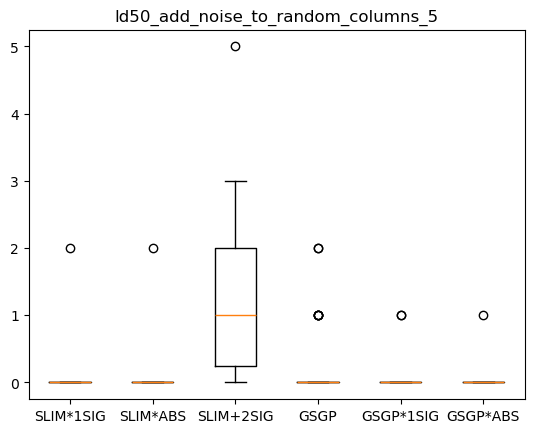

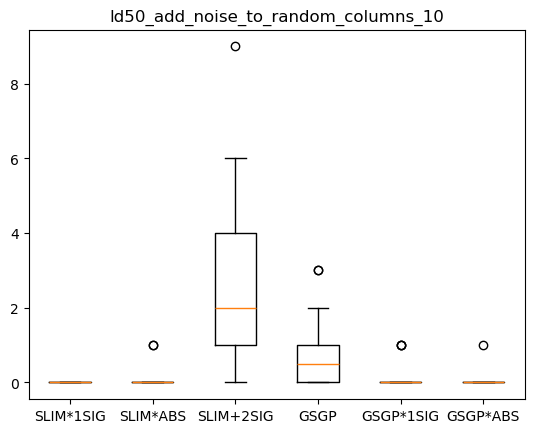

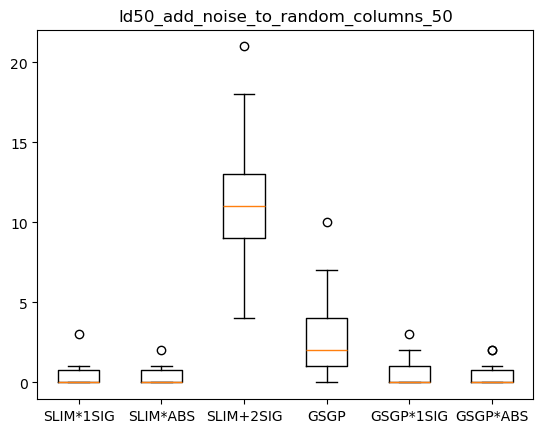

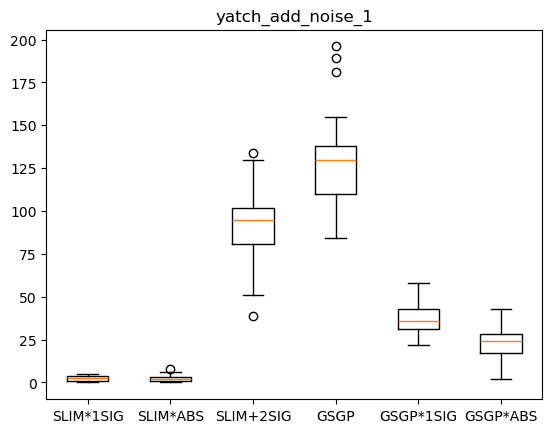

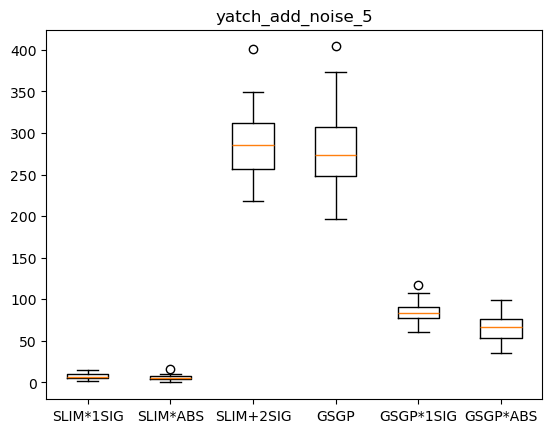

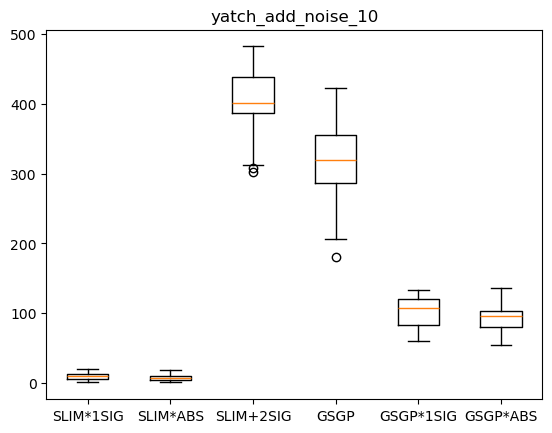

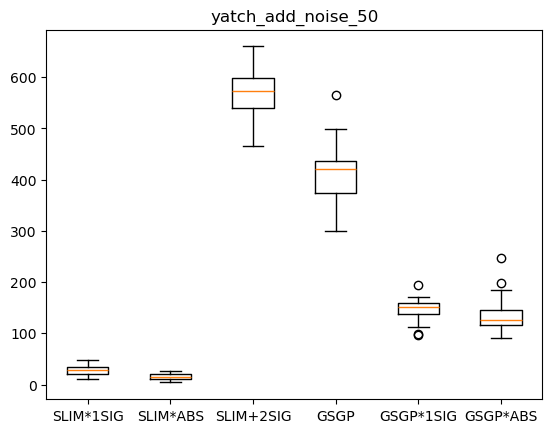

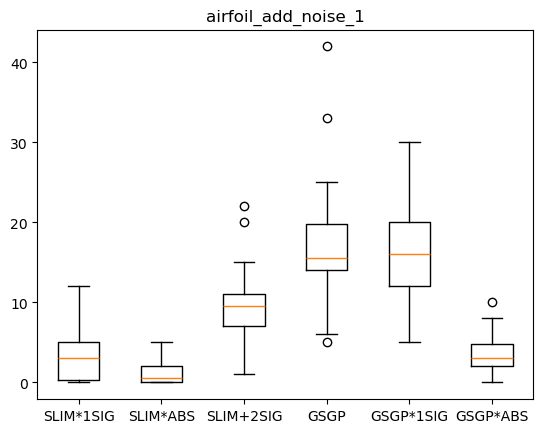

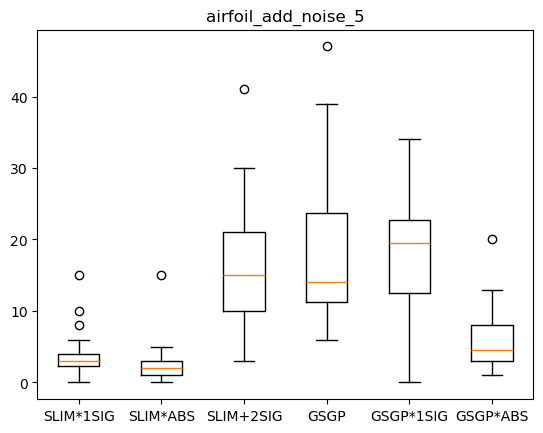

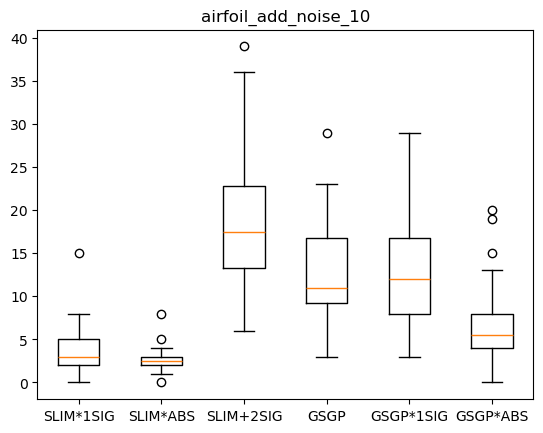

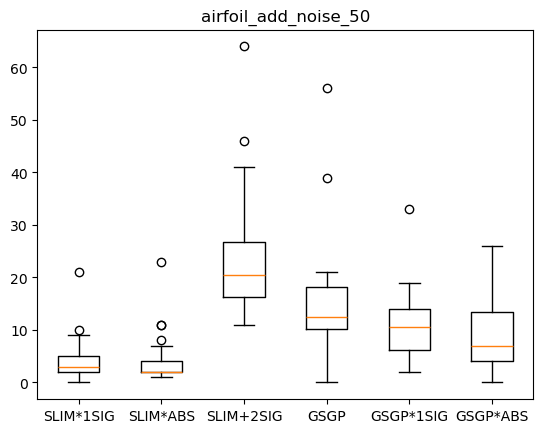

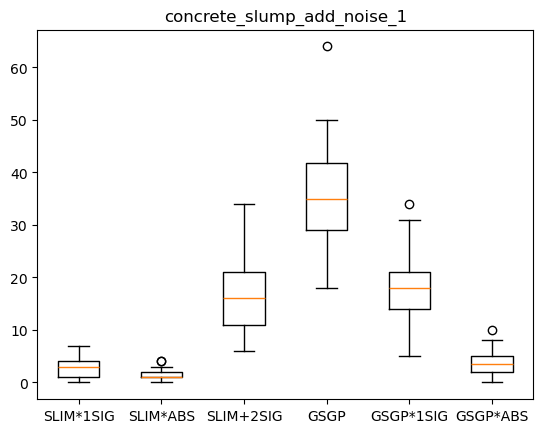

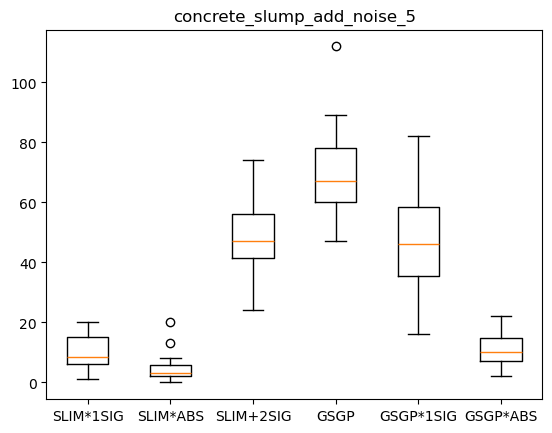

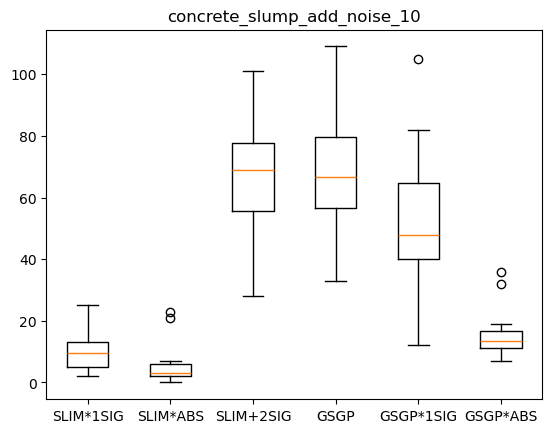

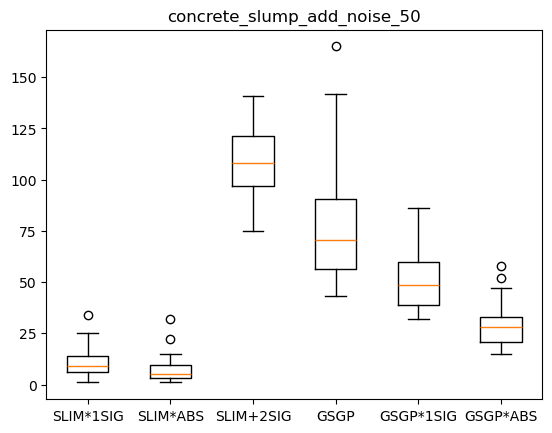

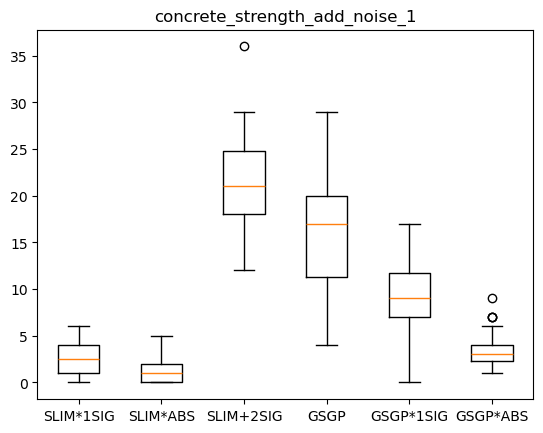

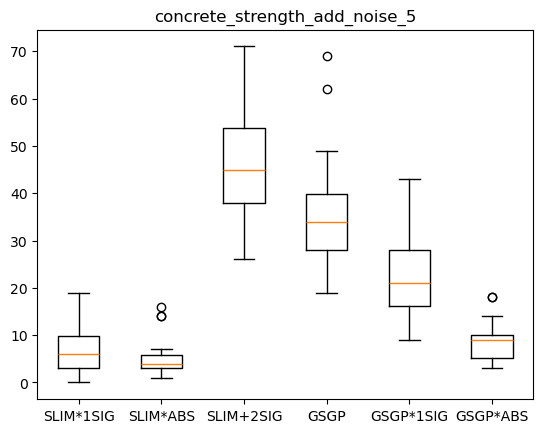

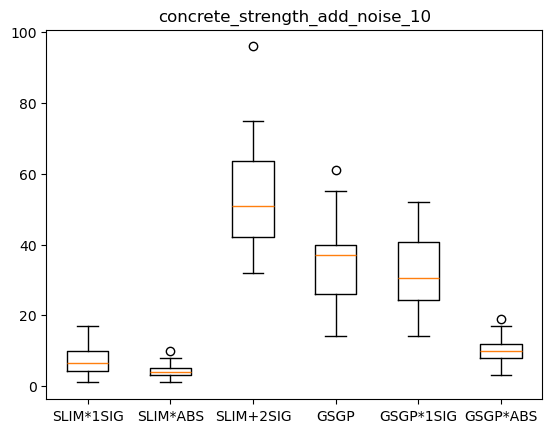

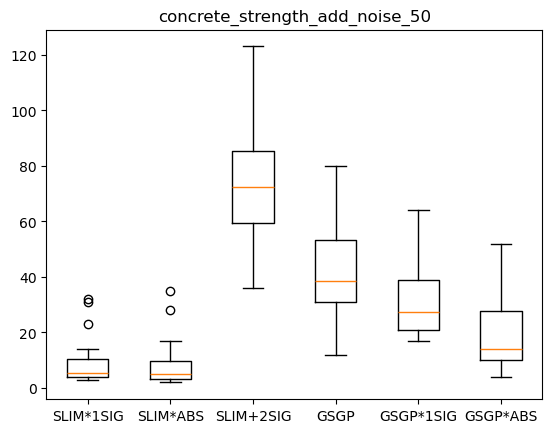

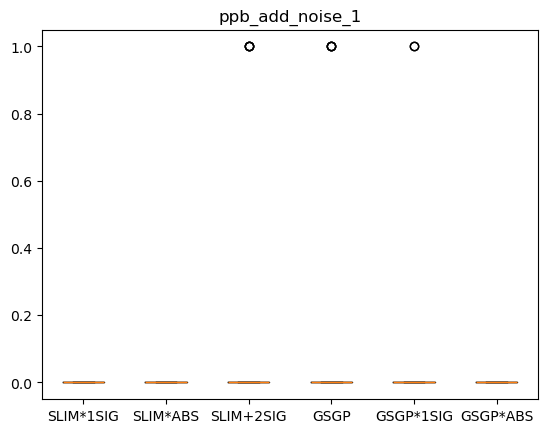

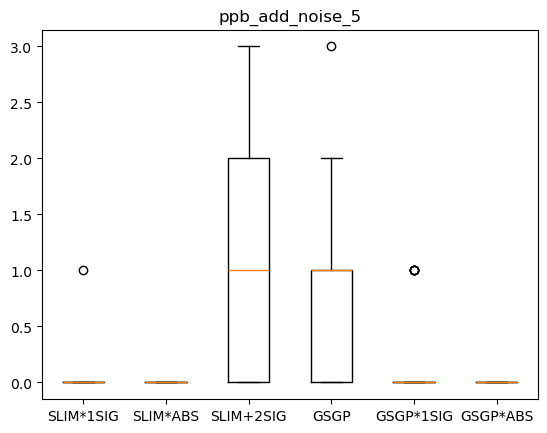

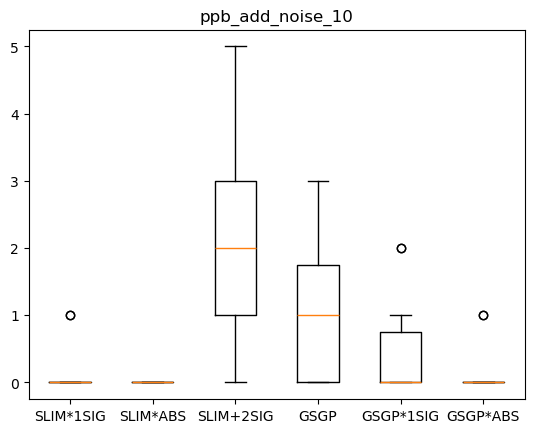

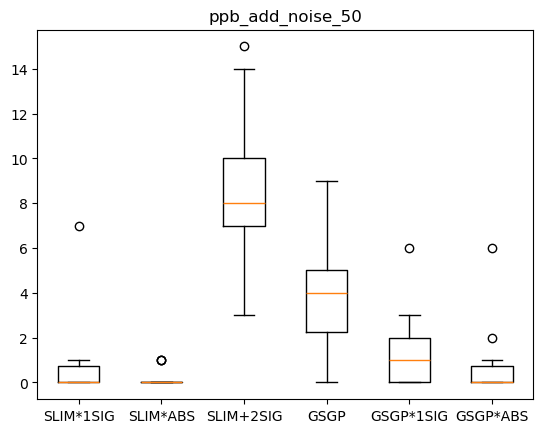

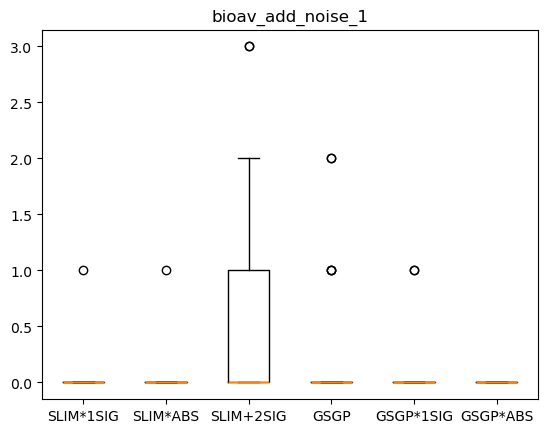

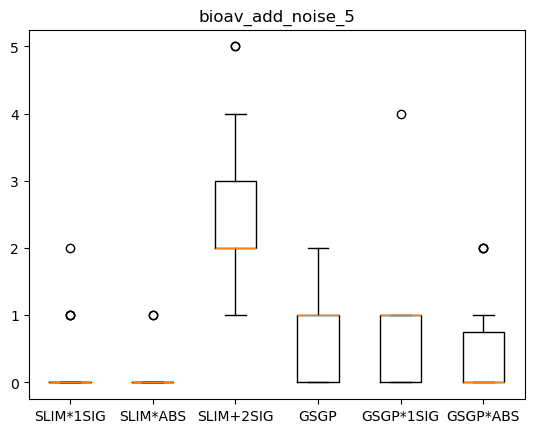

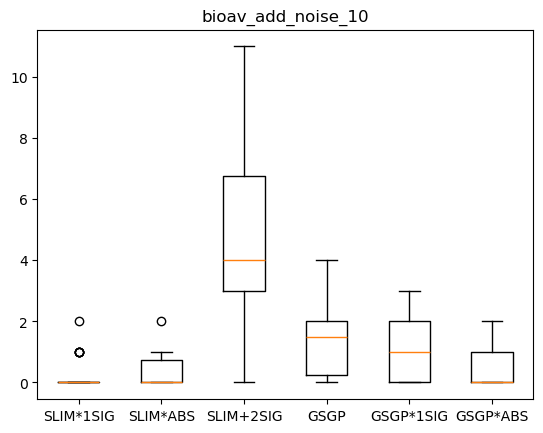

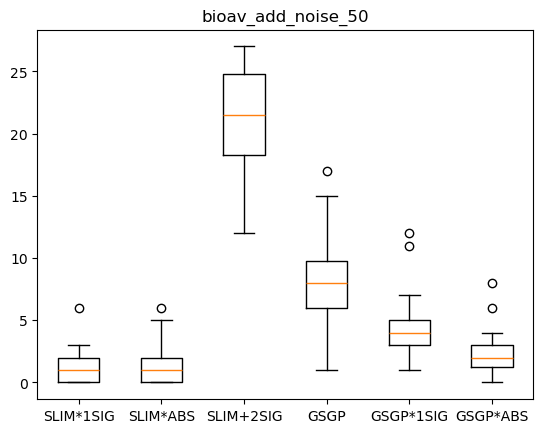

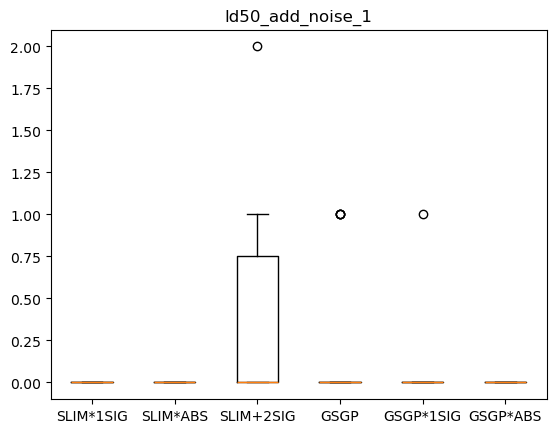

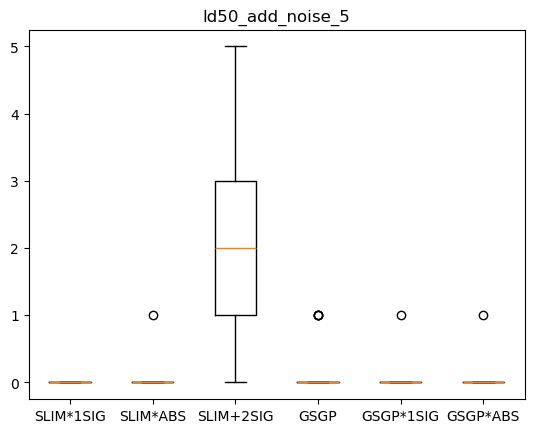

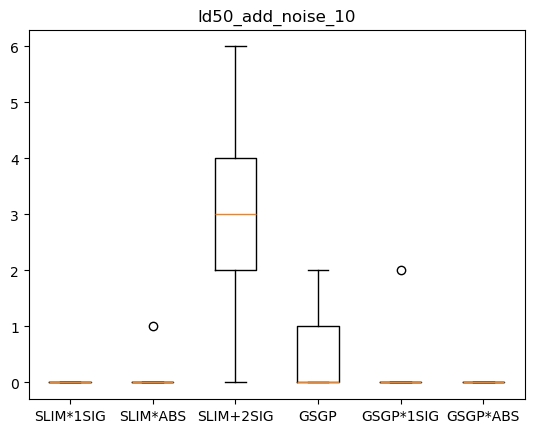

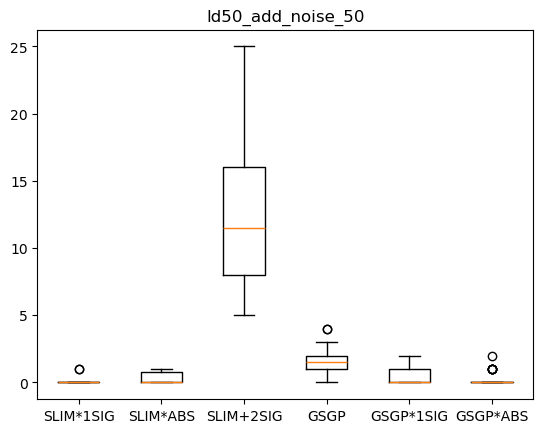

In [46]:
for experiment in counts.experiment.unique():
    for datas in counts.dataset.unique(): 
        for noise in counts.noise.unique():

            plt.boxplot([counts.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")["count_v"].values.tolist() 
                        for algo in counts.algo.unique()], labels  = counts.algo.unique())


            plt.title(f'{datas}_{experiment}_{noise}')
            # plt.legend()
            plt.show()

In [68]:
grouped = counts[["experiment", "dataset",   "noise", "algo", "count_v"]].groupby(["experiment", "dataset",   "noise", "algo"]).median()

In [69]:
grouped

count_v
experiment                  dataset           noise algo              
add_noise                   airfoil           1     GSGP          14.0
                                                    SLIM*1SIG      1.5
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      7.0
                                              5     GSGP          13.5
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       2.5
                                                    SLIM+2SIG     18.5
                                              10    GSGP          15.0
                                                    SLIM*1SIG      3.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     17.5
                                              50    GSGP          11.5
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     23.0
                            bioav             1     GSGP           0.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      0.5
                                              5     GSGP           0.5
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      3.0
                                              10    GSGP           1.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      4.5
                                              50    GSGP           8.0
                                                    SLIM*1SIG      0.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     22.0
                            concrete_slump    1     GSGP          38.0
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     12.0
                                              5     GSGP          67.0
                                                    SLIM*1SIG      8.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     52.0
                                              10    GSGP          70.5
                                                    SLIM*1SIG     11.0
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG     69.5
                                              50    GSGP          68.0
                                                    SLIM*1SIG      8.5
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG    100.0
                            concrete_strength 1     GSGP          15.0
                                                    SLIM*1SIG      2.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     23.0
                                              5     GSGP          33.0
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       4.5
                